## Data Visualization of Bird Strikes between 2000 – 2011


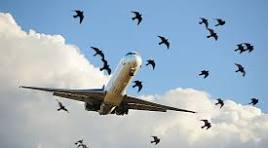

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Load the Packages and Data](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)
    - 3.4 [Post Profiling](#section304)
4. [Question](#section4)
    - 4.1 [Visuals Depicting the Number of Bird Strikes](#section401)
    - 4.2 [Yearly Analysis](#section402)
    - 4.3 [Bird Strikes in US](#section403)
    - 4.4 [Top 10 US Airlines in terms of having encountered bird strikes](#section404)
    - 4.5 [ Airports with most incidents of bird strikes – Top 50](#section405)
    - 4.6 [Yearly Cost Incurred due to Bird Strikes](#section406)
    - 4.7 [When do most bird strikes occur?](#section407)
    - 4.8 [Altitude of airplanes at the time of strike](#section408)
    - 4.9 [Phase of flight at the time of strike ](#section409)
    - 4.10 [Average Altitude of the airplanes in different phases at the time of strike](#section4010)
    - 4.11 [Effect of Bird Strikes ](#section4011)
    - 4.12 [ Impact on Flight](#section4012)
    - 4.13 [Effect of Strike at Different Altitude](#section4013)
    - 4.14 [Were Pilots Informed?](#section4014)
    - 4.15 [Prior Warning and Effect of Strike Relation](#section4015)

# ---------------------------------------------------------------------------------------------------------

### 1. [Problem Statement:](#section)


Transport and communication is one of the crucial domain in field of analytics.
Environmental impacts and safety are, nowadays, two major concerns of the scientific
community with respect to transport scenarios and to the ever-growing urban areas.
These issues gain more importance due to the increasing amount of vehicles and people.
Seeking for new solutions is reaching a point where available technologies and artificial
intelligence, especially MAS, are being recognized as ways to cope and tackle these
kinds of problems in a distributed and more appropriate way.

A bird strike is strictly defined as a collision between a bird and an aircraft which is in
flight or on a take-off or landing roll. The term is often expanded to cover other wildlife
strikes - with bats or ground animals. Bird Strike is common and can be a significant
threat to aircraft safety. For smaller aircraft, significant damage may be caused to the
aircraft structure and all aircraft, especially jet-engine ones, are vulnerable to the loss of
thrust which can follow the ingestion of birds into engine air intakes. This has resulted in
several fatal accidents. Bird strikes may occur during any phase of flight, but are most
likely during the take-off, initial climb, approach and landing phases due to the greater
numbers of birds in flight at lower levels. To have a closer look the following document
visually depicts the data collected on Bird Strikes by FAA between 2000-2011.


# 2. [Load the Packages and Data](#section2)

### [Importing Packages](#section)

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from pandas_profiling import ProfileReport
# from pydantic_settings import BaseSettings

import datetime as dt

### [Loading DataSet](#section)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
bird_data = pd.read_csv("/content/drive/MyDrive/Data Analytics Projects/Bird_Strikes/Bird Strikes data.xlsx - Bird Strikes.csv")


# 3. [Data Profiling](#section3)

## 3.1 [Understanding the Dataset](#section3)

In [67]:
bird_data.shape

(25558, 26)

Bird_strike Dataset has **25558 rows** and **26 columns**

In [68]:
bird_data.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [69]:
bird_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [70]:
bird_data.head(5)

Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight     FlightDate  \
0                             859         Engine Shut Down  11/23/00 0:00   
1                             424                      NaN   7/25/01 0:00   
2                             261                      NaN   9/14/01 0:00   
3                             806    Precautionary Landing    9/5/02 0:00   
4                             942                      NaN   6/23/03 0:00   

  Effect: Indicated Damage  ... Remains of wildlife sent to Smithsonian  \
0            Caused damage  ...                                   False   
1            Caused damage  ...                                   False   
2                No damage  ...                                   False   
3                No damage  ...                                   False   
4                No damage  ...                                   False   

                                             Remarks Wildlife: Size  \
0  FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...         Medium   
1  102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...          Small   
2  FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...          Small   
3  NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...          Small   
4                                      NO DMG REPTD.          Small   

  Conditions: Sky      Wildlife: Species  Pilot warned of birds or wildlife?  \
0        No Cloud  Unknown bird - medium                                   N   
1      Some Cloud            Rock pigeon                                   Y   
2        No Cloud      European starling                                   N   
3      Some Cloud      European starling                                   Y   
4        No Cloud      European starling                                   N   

   Cost: Total $ Feet above ground Number of people injured Is Aircraft Large?  
0         30,736             1,500                        0                Yes  
1              0                 0                        0                 No  
2              0                50                        0                 No  
3              0                50                        0                Yes  
4              0                50                        0                 No  

[5 rows x 26 columns]

In [71]:
bird_data.describe()

Record ID  Wildlife: Number Struck Actual  Number of people injured
count   25558.000000                    25558.000000              25558.000000
mean   253916.085609                        2.691525                  0.001056
std     38510.453382                       12.793975                  0.050420
min      1195.000000                        1.000000                  0.000000
25%    225783.750000                        1.000000                  0.000000
50%    248749.000000                        1.000000                  0.000000
75%    269168.750000                        1.000000                  0.000000
max    321909.000000                      942.000000                  6.000000

In [72]:
bird_data.describe(include="all")

Record ID Aircraft: Type                Airport: Name  \
count    25558.000000          25429                        25429   
unique            NaN              1                         1109   
top               NaN       Airplane  DALLAS/FORT WORTH INTL ARPT   
freq              NaN          25429                          803   
mean    253916.085609            NaN                          NaN   
std      38510.453382            NaN                          NaN   
min       1195.000000            NaN                          NaN   
25%     225783.750000            NaN                          NaN   
50%     248749.000000            NaN                          NaN   
75%     269168.750000            NaN                          NaN   
max     321909.000000            NaN                          NaN   

       Altitude bin Aircraft: Make/Model Wildlife: Number struck  \
count         25429                25558                   25429   
unique            2                  351                       4   
top       < 1000 ft            B-737-700                       1   
freq          20556                 2488                   20790   
mean            NaN                  NaN                     NaN   
std             NaN                  NaN                     NaN   
min             NaN                  NaN                     NaN   
25%             NaN                  NaN                     NaN   
50%             NaN                  NaN                     NaN   
75%             NaN                  NaN                     NaN   
max             NaN                  NaN                     NaN   

        Wildlife: Number Struck Actual Effect: Impact to flight  \
count                     25558.000000                     2078   
unique                             NaN                        4   
top                                NaN    Precautionary Landing   
freq                               NaN                     1121   
mean                          2.691525                      NaN   
std                          12.793975                      NaN   
min                           1.000000                      NaN   
25%                           1.000000                      NaN   
50%                           1.000000                      NaN   
75%                           1.000000                      NaN   
max                         942.000000                      NaN   

           FlightDate Effect: Indicated Damage  ...  \
count           25429                    25558  ...   
unique           4225                        2  ...   
top     10/28/10 0:00                No damage  ...   
freq               28                    23081  ...   
mean              NaN                      NaN  ...   
std               NaN                      NaN  ...   
min               NaN                      NaN  ...   
25%               NaN                      NaN  ...   
50%               NaN                      NaN  ...   
75%               NaN                      NaN  ...   
max               NaN                      NaN  ...   

       Remains of wildlife sent to Smithsonian  Remarks Wildlife: Size  \
count                                    25558    20787          25429   
unique                                       2    18186              3   
top                                      False  NO DMG.          Small   
freq                                     23601      740          17412   
mean                                       NaN      NaN            NaN   
std                                        NaN      NaN            NaN   
min                                        NaN      NaN            NaN   
25%                                        NaN      NaN            NaN   
50%                                        NaN      NaN            NaN   
75%                                        NaN      NaN            NaN   
max                                        NaN      NaN            NaN   

       Cond

In [73]:
bird_data.sort_values(by='Wildlife: Number Struck Actual',ascending=False).head(50)

Record ID Aircraft: Type                   Airport: Name Altitude bin  \
4        219878       Airplane                    NORFOLK INTL    < 1000 ft   
0        202152       Airplane                    LAGUARDIA NY    > 1000 ft   
3        215953       Airplane             SEATTLE-TACOMA INTL    < 1000 ft   
5        218432       Airplane             GUAYAQUIL/S BOLIVAR    < 1000 ft   
1        208159       Airplane     DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
7        236635       Airplane     WASHINGTON DULLES INTL ARPT    < 1000 ft   
2        207601       Airplane               LAKEFRONT AIRPORT    < 1000 ft   
6        221697       Airplane               NEW CASTLE COUNTY    < 1000 ft   
4443     227988       Airplane  NEWPORT NEWS/WILLIAMSBURG INTL    < 1000 ft   
4355     212695       Airplane             SALT LAKE CITY INTL    < 1000 ft   
4604     306240       Airplane              HONOLULU INTL ARPT    < 1000 ft   
4336     201545       Airplane              METRO OAKLAND INTL    < 1000 ft   
4457     231449       Airplane             JOHN F KENNEDY INTL    < 1000 ft   
4471     235594       Airplane                  HILO INTL ARPT    < 1000 ft   
4500     242331       Airplane             BALTIMORE WASH INTL    < 1000 ft   
4477     236097       Airplane          CAPITAL CITY ARPT (PA)    < 1000 ft   
4333     200097       Airplane               INDIANAPOLIS INTL    < 1000 ft   
4562     261101       Airplane                LOS ANGELES INTL    < 1000 ft   
4629     315635       Airplane                  DUPAGE AIRPORT    < 1000 ft   
4506     237967       Airplane      MIDDLETON MUNI MOREY FIELD    < 1000 ft   
4383     213196       Airplane    ORLANDO SANFORD INTL AIRPORT    < 1000 ft   
4349     206282       Airplane         WESTCHESTER COUNTY ARPT    < 1000 ft   
4385     216777       Airplane                 BURKE LAKEFRONT    < 1000 ft   
4388     213687       Airplane                    LAGUARDIA NY    < 1000 ft   
4408     219549       Airplane         SAN FRANCISCO INTL ARPT    < 1000 ft   
4428     219261       Airplane                    BRADLEY INTL    < 1000 ft   
4469     230077       Airplane             BALTIMORE WASH INTL    < 1000 ft   
4594     303289       Airplane             RALEIGH-DURHAM INTL    < 1000 ft   
4526     250842       Airplane    SPRINGFIELD-BRANSON NATIONAL    < 1000 ft   
4406     218079       Airplane        TEHACHAPI MUNICIPAL ARPT    > 1000 ft   
4360     209791       Airplane     DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
4617     312313       Airplane               TETERBORO AIRPORT    < 1000 ft   
4354     207664       Airplane             BALTIMORE WASH INTL    < 1000 ft   
4384     211413       Airplane                 SACRAMENTO INTL    < 1000 ft   
4435     225237       Airplane    EUGENIO MARIA DE HOSTOS ARPT    < 1000 ft   
4598     305572       Airplane               GARY CHICAGO INTL    < 1000 ft   
4590     303169       Airplane    ORLANDO SANFORD INTL AIRPORT    < 1000 ft   
4589     303104       Airplane                    ATLANTA INTL    < 1000 ft   
4394     211516       Airplane                      LOGAN INTL    < 1000 ft   
4541     252219       Airplane      WILKES-BARRE/SCRANTON INTL    < 1000 ft   
4431     221779       Airplane             EVANSVILLE REGIONAL    < 1000 ft   
4377     212100       Airplane     DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
4356     209318       Airplane                    KAHULUI ARPT    < 1000 ft   
4468     233208       Airplane   RONALD REAGAN WASHINGTON NATL    < 1000 ft   
4386     209419       Airplane              GREATER PITTSBURGH    < 1000 ft   
4623     313575       Airplane                 HARRISBURG INTL    < 1000 ft   
4561     261159       Airplane            LOUISVILLE INTL ARPT    < 1000 ft   
4371     208840       Airplane             RALEIGH-DURHAM INTL    < 1000 ft   
4461     233224       Airplane                LOS ANGELES INTL    < 1000 ft   
4533     256762       Airplane              WACO REGIONA

In [74]:
bird_data.groupby('Airport: Name')['Wildlife: Number Struck Actual'].sum().sort_values(ascending=False)

Airport: Name
DALLAS/FORT WORTH INTL ARPT    2933
SACRAMENTO INTL                1856
LAGUARDIA NY                   1579
PHILADELPHIA INTL              1396
SALT LAKE CITY INTL            1376
                               ... 
GRIFFING SANDUSKY ARPT            1
SAN SALVADOR INTL                 1
MARIANNA MUNICIPAL ARPT           1
MARCO POLO INTL                   1
ZURICH                            1
Name: Wildlife: Number Struck Actual, Length: 1109, dtype: int64

In [75]:
bird_data['Airport: Name'].value_counts()

Airport: Name
DALLAS/FORT WORTH INTL ARPT    803
SACRAMENTO INTL                676
SALT LAKE CITY INTL            479
DENVER INTL AIRPORT            476
KANSAS CITY INTL               452
                              ... 
ORCAS ISLAND ARPT                1
T B LETTSOME INTL                1
DYERSBURG REGIONAL ARPT          1
MCCORD FIELD ARPT                1
PRINCESS JULIANA                 1
Name: count, Length: 1109, dtype: int64

In [76]:
bird_data['Airport: Name'].value_counts(normalize=True)*100

Airport: Name
DALLAS/FORT WORTH INTL ARPT    3.157812
SACRAMENTO INTL                2.658382
SALT LAKE CITY INTL            1.883676
DENVER INTL AIRPORT            1.871879
KANSAS CITY INTL               1.777498
                                 ...   
ORCAS ISLAND ARPT              0.003933
T B LETTSOME INTL              0.003933
DYERSBURG REGIONAL ARPT        0.003933
MCCORD FIELD ARPT              0.003933
PRINCESS JULIANA               0.003933
Name: proportion, Length: 1109, dtype: float64

It has been observed that Top 3 Bird Strike on Airport are :__DALLAS/FORT WORTH INTL ARPT,SACRAMENTO INTL__ and __SALT LAKE CITY INTL__

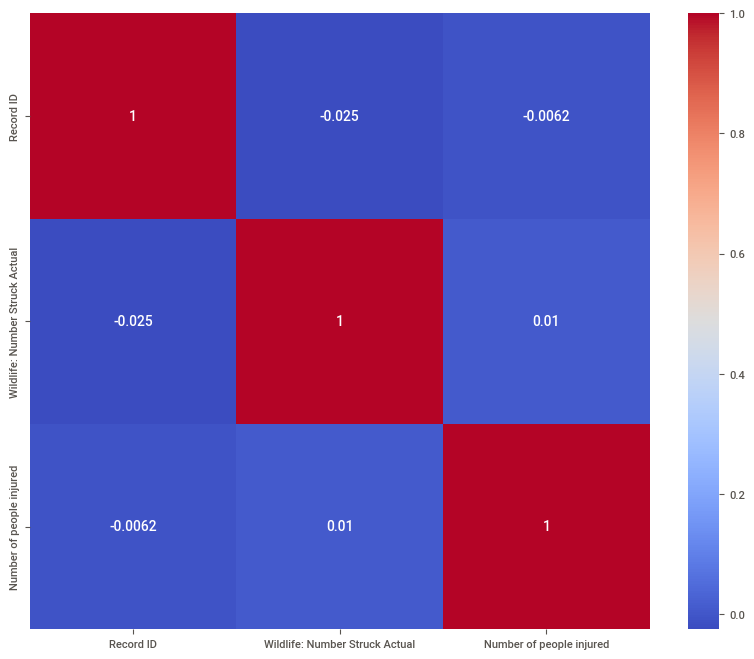

In [77]:
Bird_strike_numeric = bird_data.select_dtypes(include=np.number)
Bird_strike_corr = Bird_strike_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(Bird_strike_corr, annot=True, cmap='coolwarm')
plt.show()


In [78]:
bird_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

### 3.2 [Pre Profiling](#section302)

Now Performing AutoEDA to Understand Data Better

In [79]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



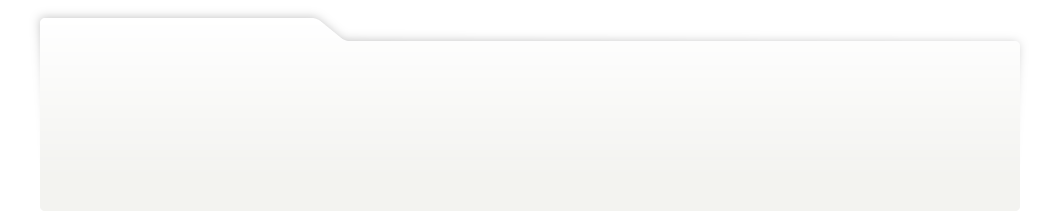
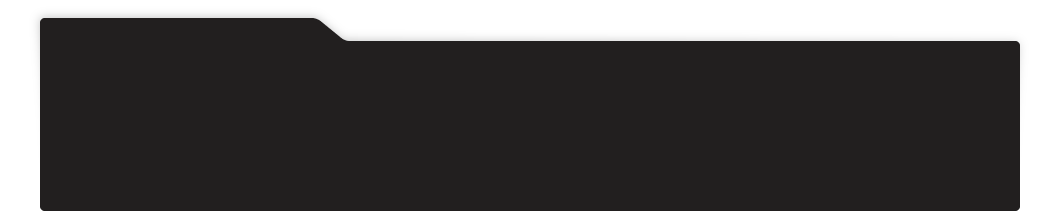
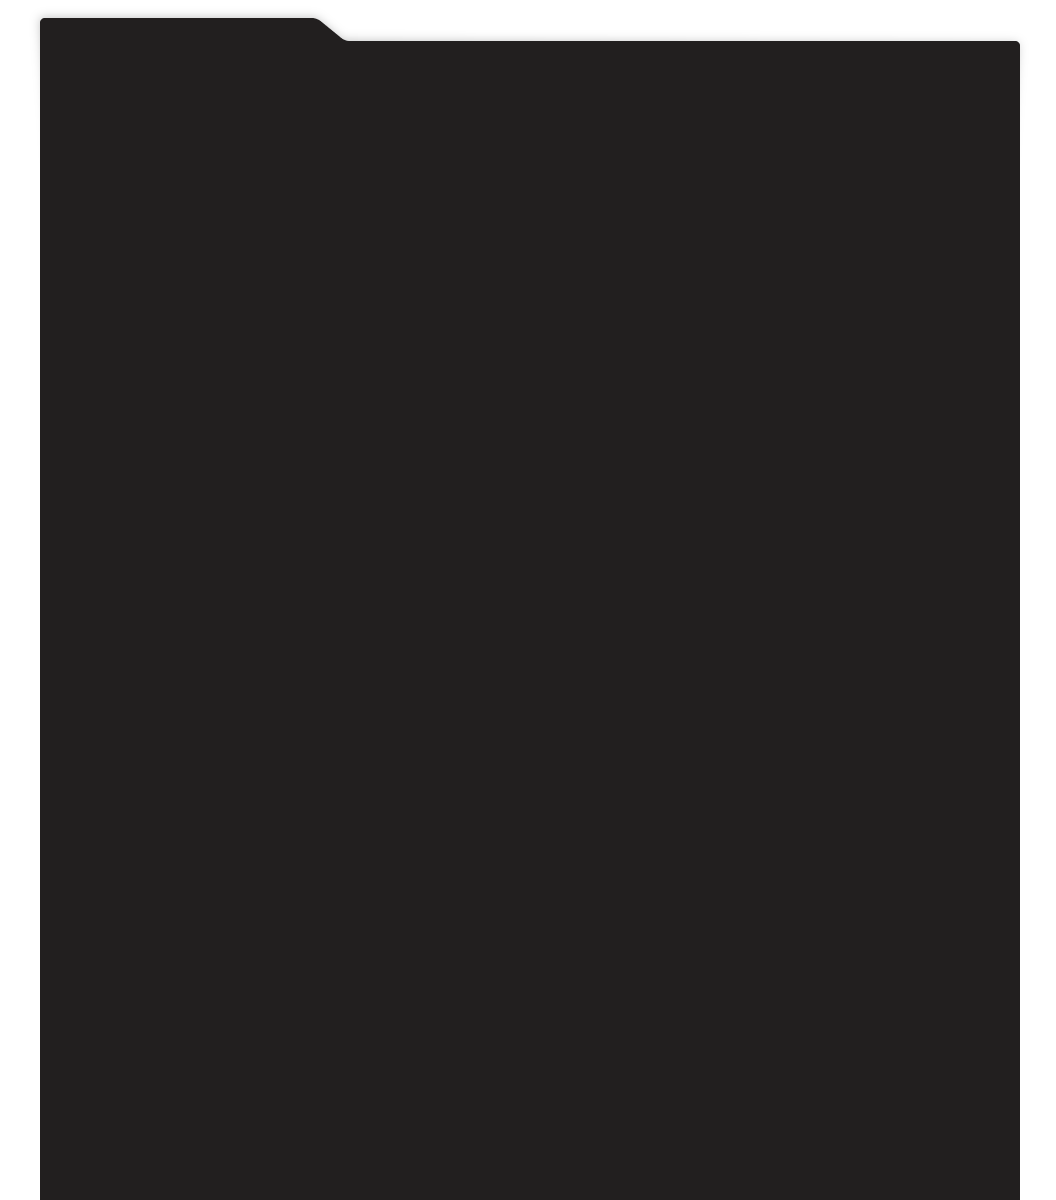
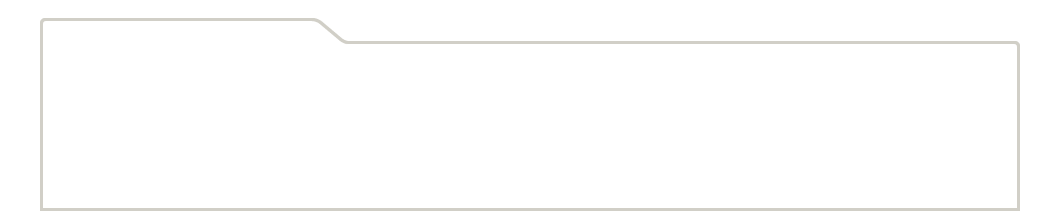
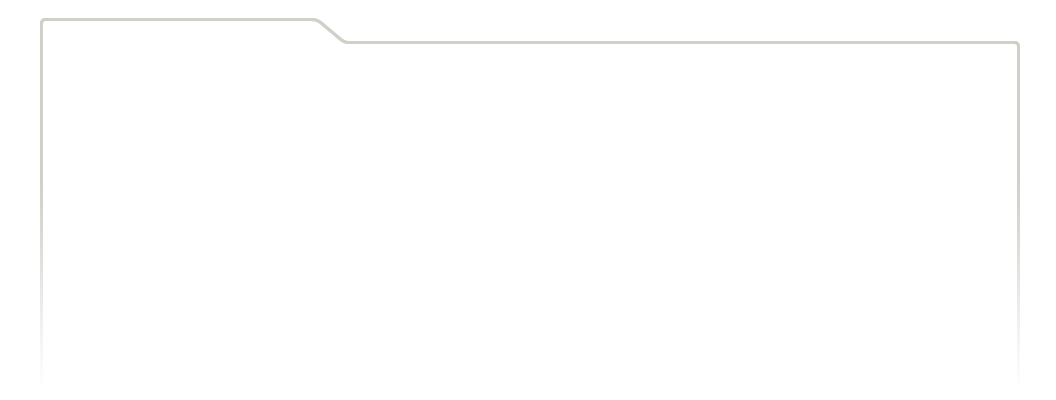
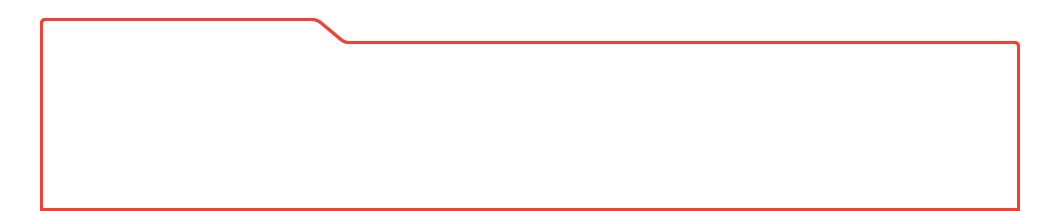
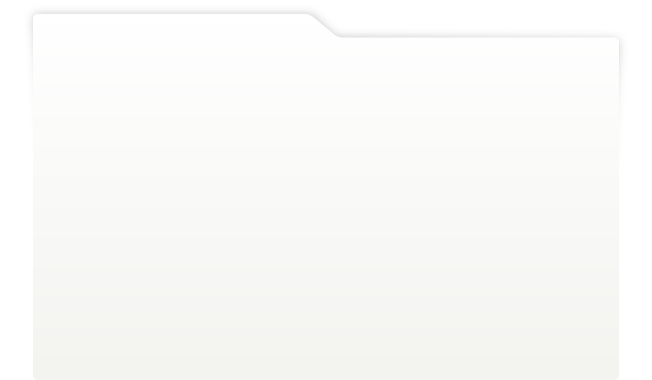
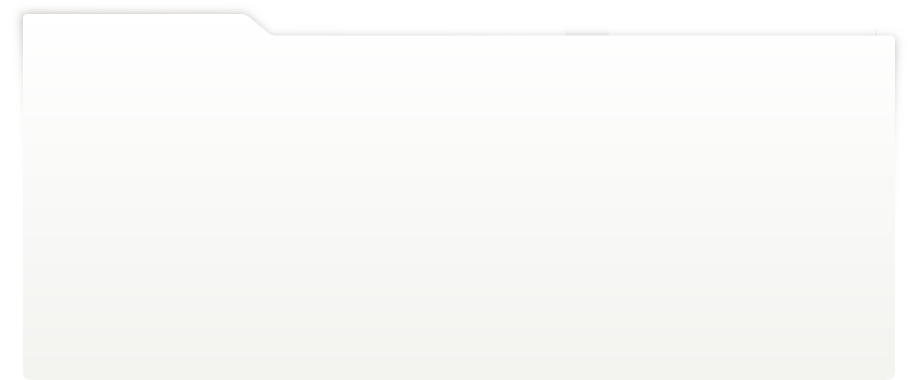
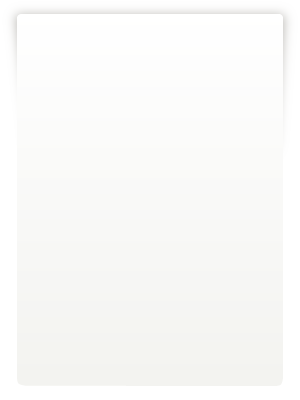
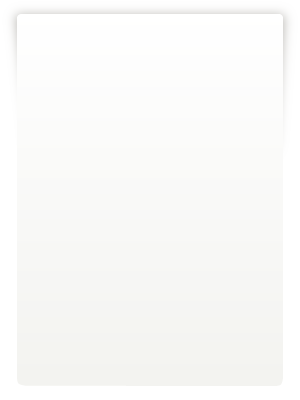
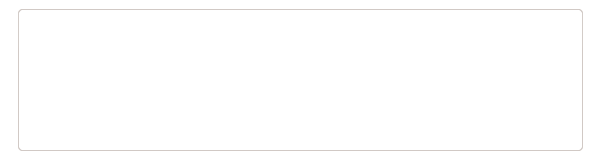
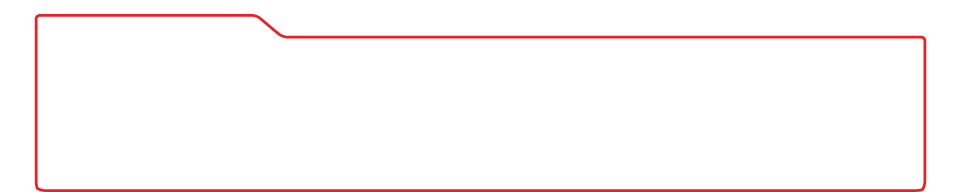
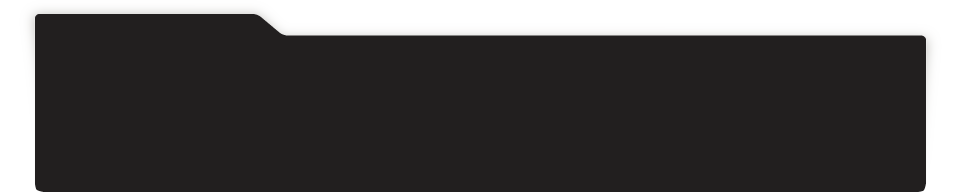
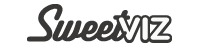
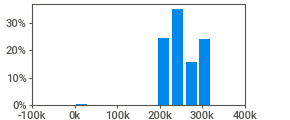
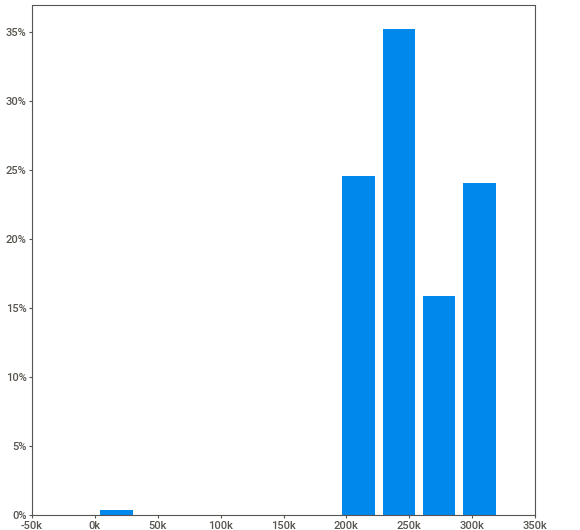
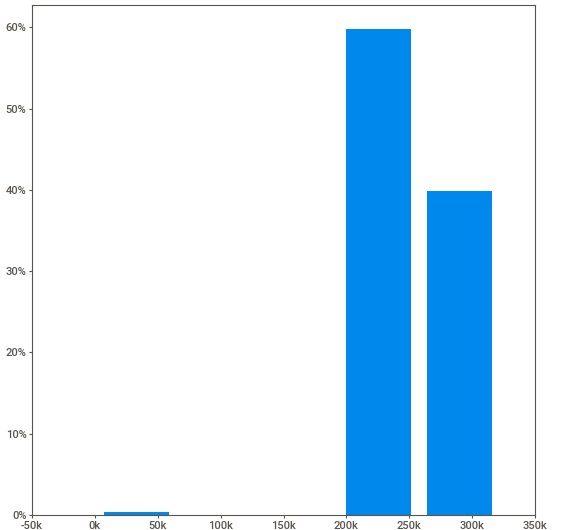
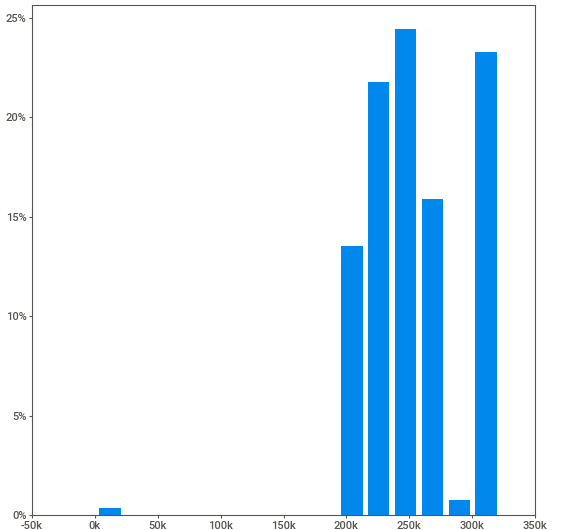
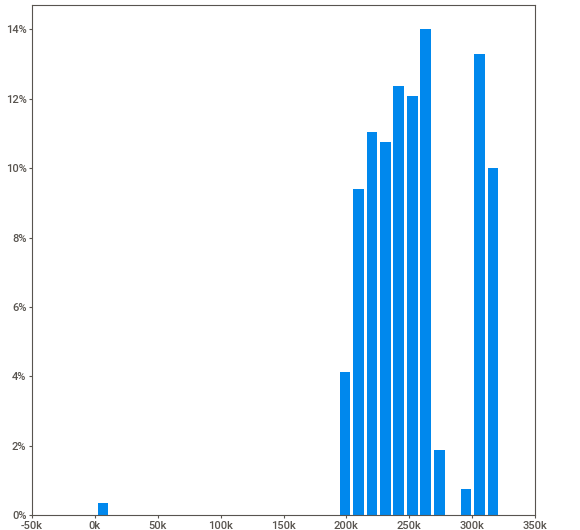
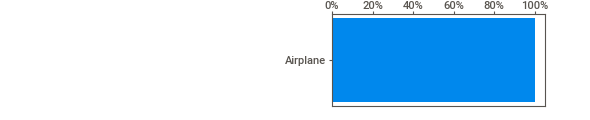
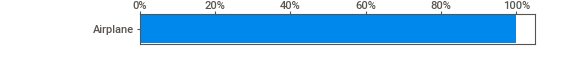
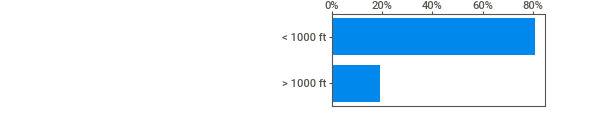
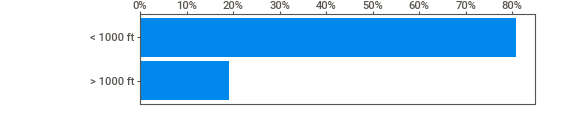
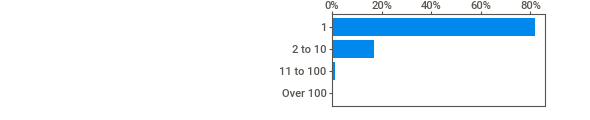
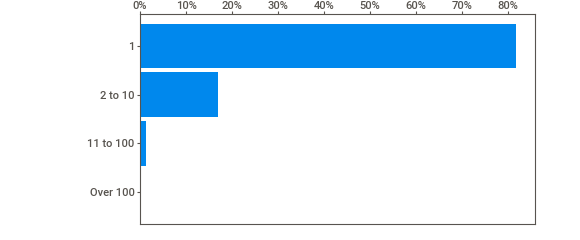
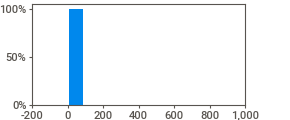
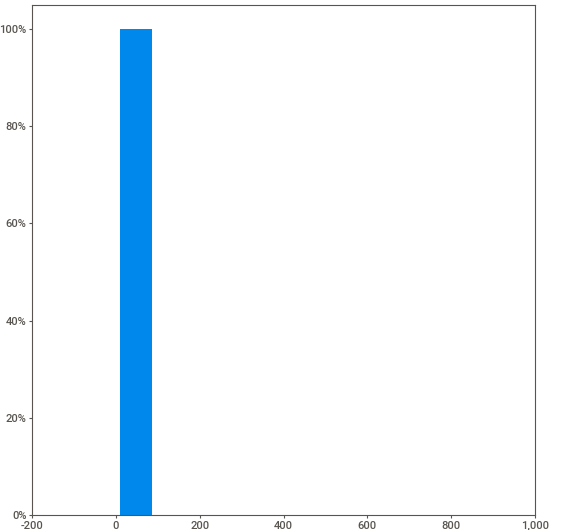
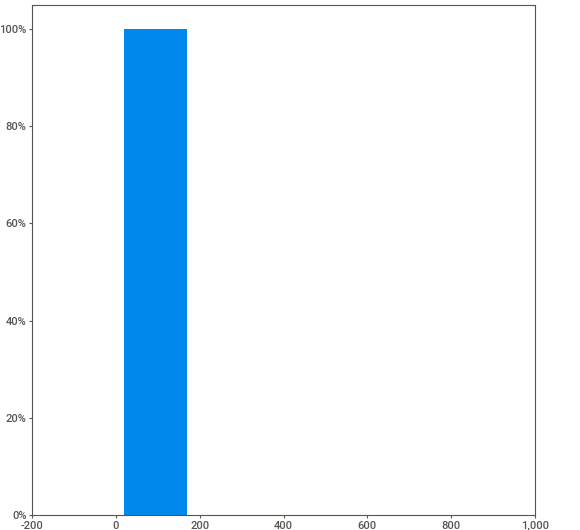
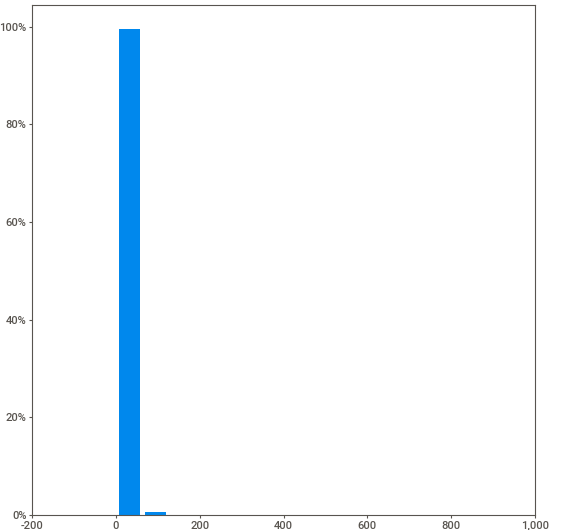
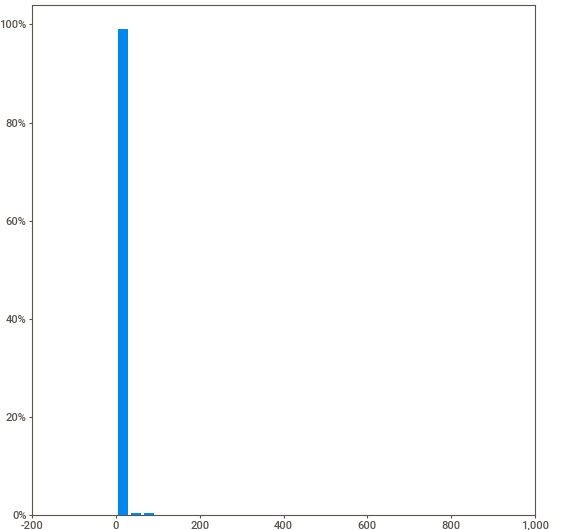
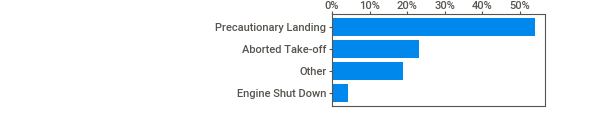
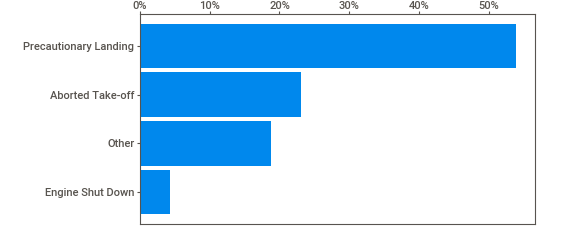
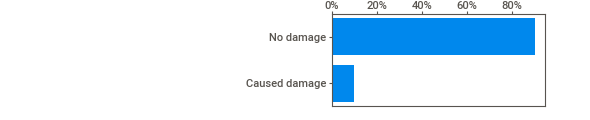
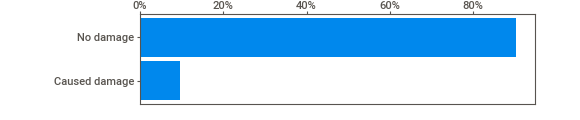
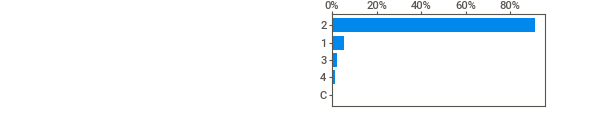
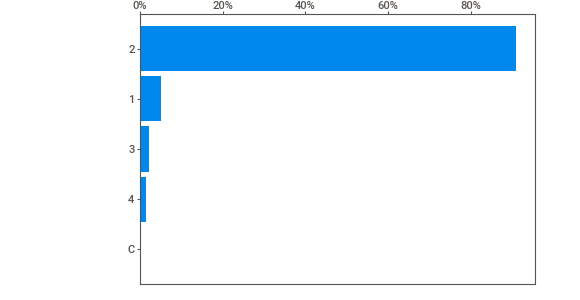
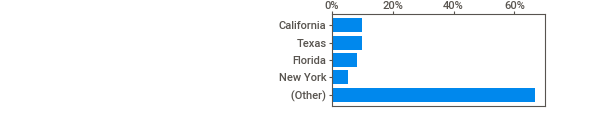
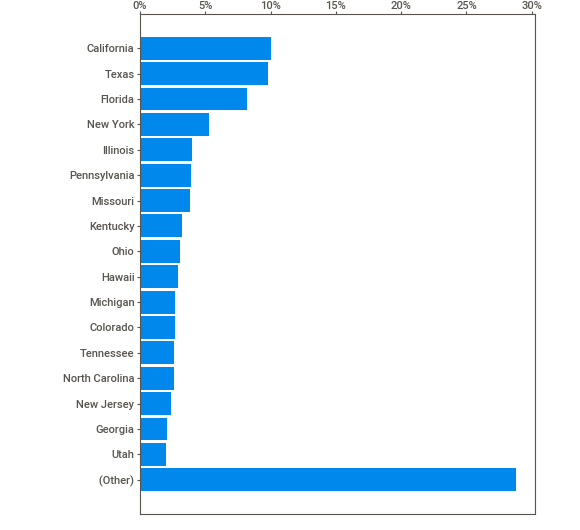
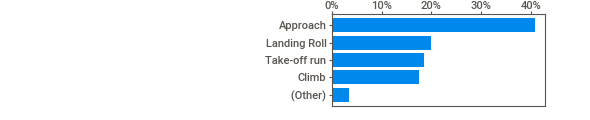
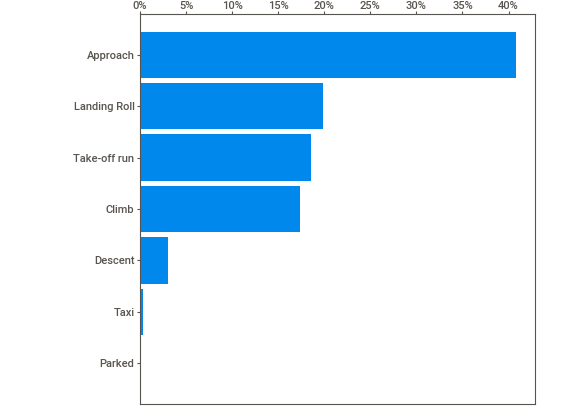
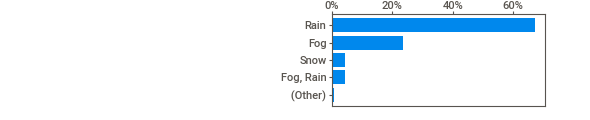
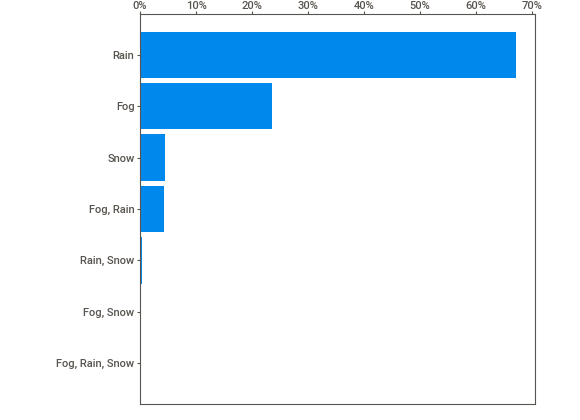
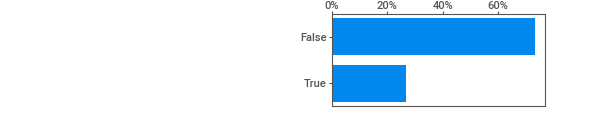
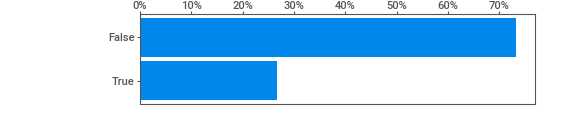
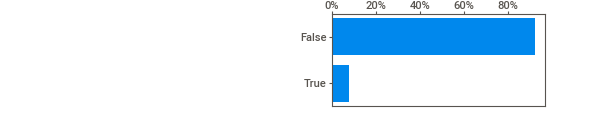
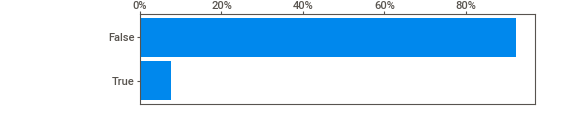
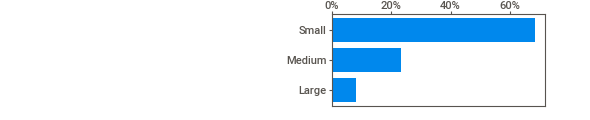
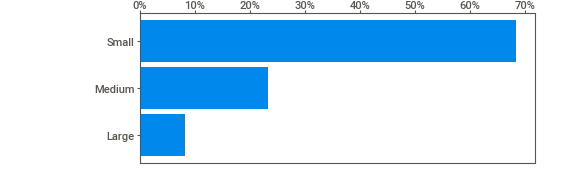
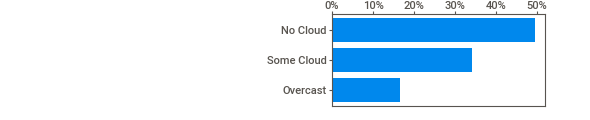
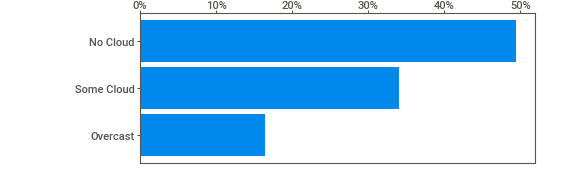
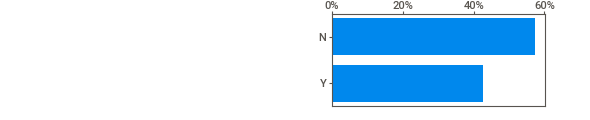
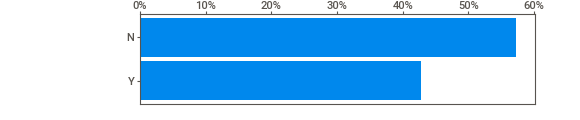
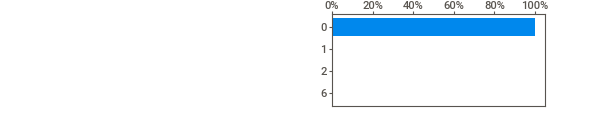
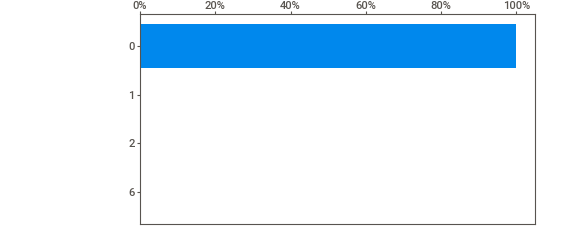
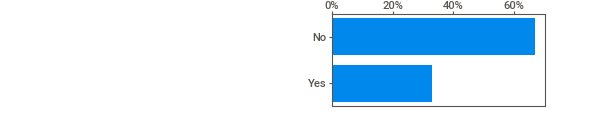
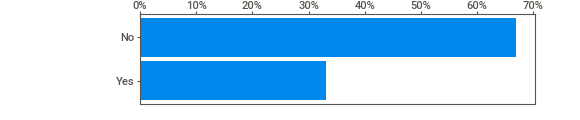
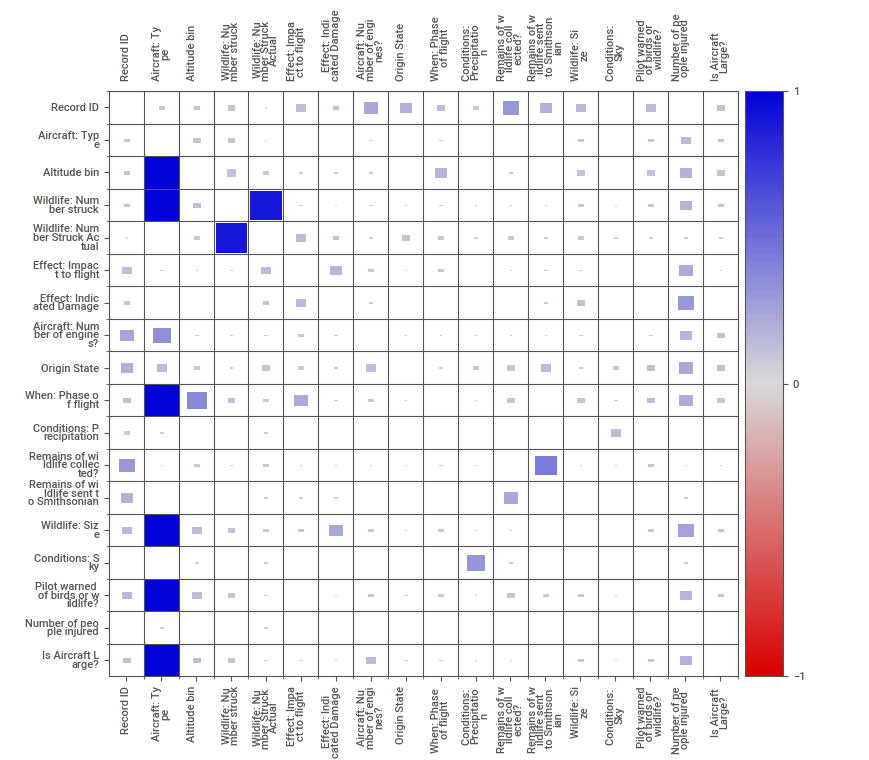
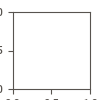

In [80]:
import sweetviz as sv

# Assuming Bird_strike is your DataFrame
report = sv.analyze(bird_data)
report.show_html('Sweetviz_Report.html')
report.show_notebook()

### 3.3 [Preprocessing](#section303)

- [Dealing with duplicate rows](#section)
    - [Find number of duplicate rows in the dataset](#section)
    - [Print the duplicate entries and analyze](#section)
    - [Drop the duplicate entries from the dataset](#section)

In [81]:
bird_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [82]:
miss_value=bird_data.isnull().sum()
miss_value_percentage=(bird_data.isnull().sum()/len(bird_data))*100
missing_data=pd.concat([miss_value,miss_value_percentage],axis=1,keys=["Total","%"])
print(missing_data)



                                         Total          %
Record ID                                    0   0.000000
Aircraft: Type                             129   0.504734
Airport: Name                              129   0.504734
Altitude bin                               129   0.504734
Aircraft: Make/Model                         0   0.000000
Wildlife: Number struck                    129   0.504734
Wildlife: Number Struck Actual               0   0.000000
Effect: Impact to flight                 23480  91.869473
FlightDate                                 129   0.504734
Effect: Indicated Damage                     0   0.000000
Aircraft: Number of engines?               267   1.044683
Aircraft: Airline/Operator                 129   0.504734
Origin State                               449   1.756788
When: Phase of flight                      129   0.504734
Conditions: Precipitation                23543  92.115972
Remains of wildlife collected?               0   0.000000
Remains of wil

In [83]:
bird_data.duplicated().sum()

0

[No duplicat value](#section)

 ##### [Drop the null Value](#section1)
    - By inserting the name of column which has null value which we want to drop
    - droping null value one column it will drop the data  all column too

In [84]:
bird_data.dropna(subset=['Aircraft: Type'],inplace=True)

['Remark' may be drop it is highly incomplete or contain many null value](#section)

In [85]:
bird_data.drop('Remarks',axis=1,inplace=True)

['Aircraft: Number of engines?'  may be droped there are many null values as well as there is no need as per problem statement](#section)

In [86]:
bird_data.drop('Aircraft: Number of engines?',axis=1,inplace=True)

In [87]:
bird_data.isnull().sum()

Record ID                                      0
Aircraft: Type                                 0
Airport: Name                                  0
Altitude bin                                   0
Aircraft: Make/Model                           0
Wildlife: Number struck                        0
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23351
FlightDate                                     0
Effect: Indicated Damage                       0
Aircraft: Airline/Operator                     0
Origin State                                 449
When: Phase of flight                          0
Conditions: Precipitation                  23414
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Wildlife: Size                                 0
Conditions: Sky                                0
Wildlife: Species                              0
Pilot warned of birds or wildlife?             0
Cost: Total $       

[Filling the null value of __Origin State__  group by __Aircraft: Airline/Operator__ and   mode of __Origin State__](#Section)

In [88]:
bird_data['Origin State']=bird_data.groupby("Aircraft: Airline/Operator")['Origin State'].fillna(Bird_strike.groupby("Aircraft: Airline/Operator")["Origin State"].agg(pd.Series.mode)[0])

[Converting object datatype into datetime of column __FlightDate__ ](#section)

In [89]:
bird_data['FlightDate'] = bird_data['FlightDate'].apply(lambda x: dt.datetime.strptime(x, "%m/%d/%y %H:%M"))


In [90]:
bird_data['FlightDate'].dt.year

0        2000
1        2001
2        2001
3        2002
4        2003
         ... 
25552    2011
25553    2011
25554    2011
25556    2011
25557    2011
Name: FlightDate, Length: 25429, dtype: int32

[Converting the object datatype into int of column __'Cost: Total $'__](#section)

In [91]:
bird_data['Cost: Total $'] = bird_data['Cost: Total $'].str.replace(',', '').astype(int)


[Converting the object datatype into int of column __'Wildlife: Number Struck Actual'__](#section)

In [92]:
bird_data['Wildlife: Number Struck Actual']=bird_data['Wildlife: Number Struck Actual'].astype(int)

[Converting the object datatype into int of column __'Feet above ground'__](#section)

In [93]:
bird_data['Feet above ground']=bird_data['Feet above ground'].str.replace(',',"").astype(int)

In [94]:
Flight_Data=bird_data.groupby(Bird_strike['FlightDate'].dt.year)['Cost: Total $'].sum()

<Axes: xlabel='FlightDate'>

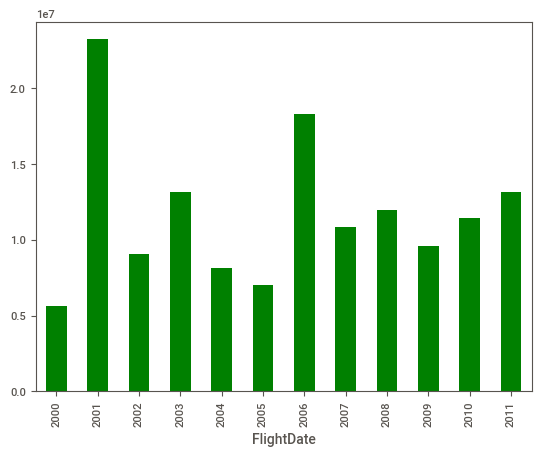

In [95]:
Flight_Data.plot(kind='bar',color='g')

In [96]:
bird_data.dtypes

Record ID                                           int64
Aircraft: Type                                     object
Airport: Name                                      object
Altitude bin                                       object
Aircraft: Make/Model                               object
Wildlife: Number struck                            object
Wildlife: Number Struck Actual                      int64
Effect: Impact to flight                           object
FlightDate                                 datetime64[ns]
Effect: Indicated Damage                           object
Aircraft: Airline/Operator                         object
Origin State                                       object
When: Phase of flight                              object
Conditions: Precipitation                          object
Remains of wildlife collected?                       bool
Remains of wildlife sent to Smithsonian              bool
Wildlife: Size                                     object
Conditions: Sk

In [97]:
bird_data.isnull().sum()

Record ID                                      0
Aircraft: Type                                 0
Airport: Name                                  0
Altitude bin                                   0
Aircraft: Make/Model                           0
Wildlife: Number struck                        0
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23351
FlightDate                                     0
Effect: Indicated Damage                       0
Aircraft: Airline/Operator                     0
Origin State                                   0
When: Phase of flight                          0
Conditions: Precipitation                  23414
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Wildlife: Size                                 0
Conditions: Sky                                0
Wildlife: Species                              0
Pilot warned of birds or wildlife?             0
Cost: Total $       

## [3.4 Post Profiling](#section)

In [98]:
!pip install sweetviz


                                             |          | [  0%]   00:00 -> (? left)


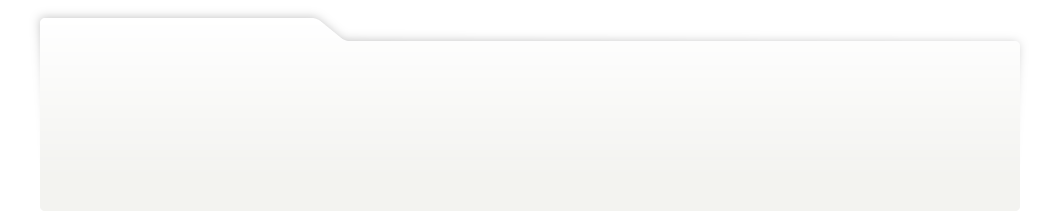
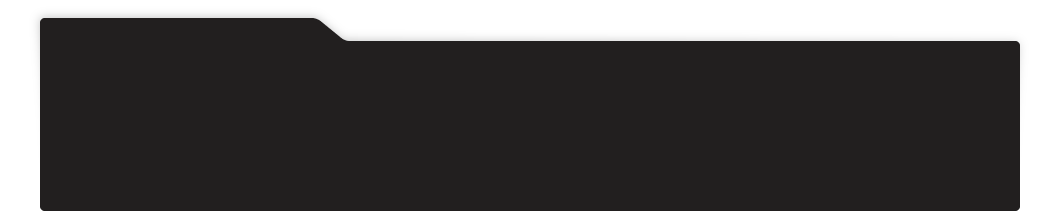
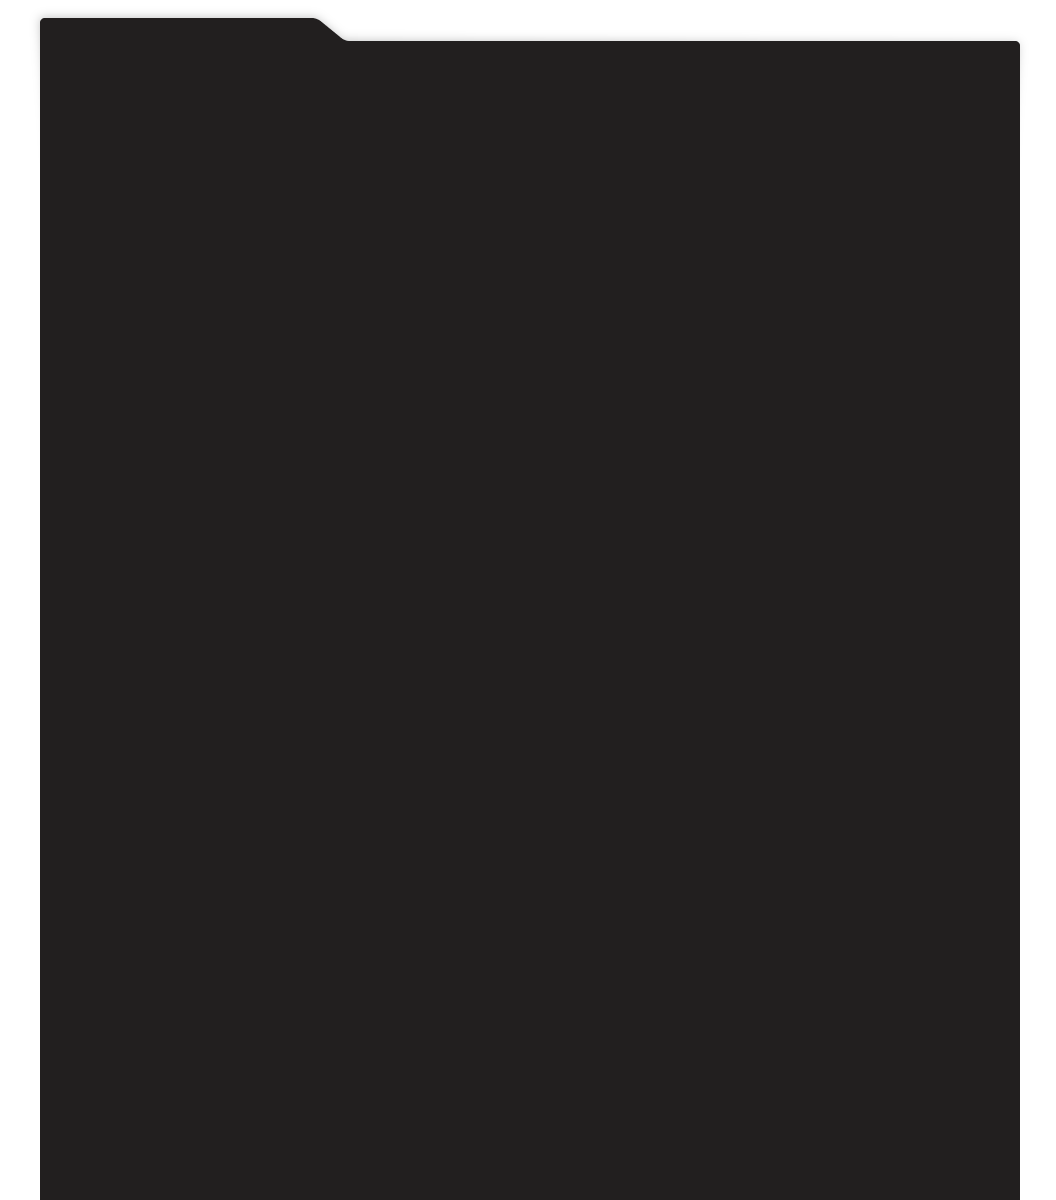
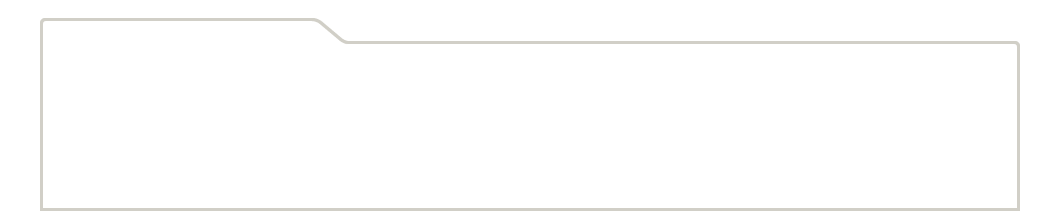
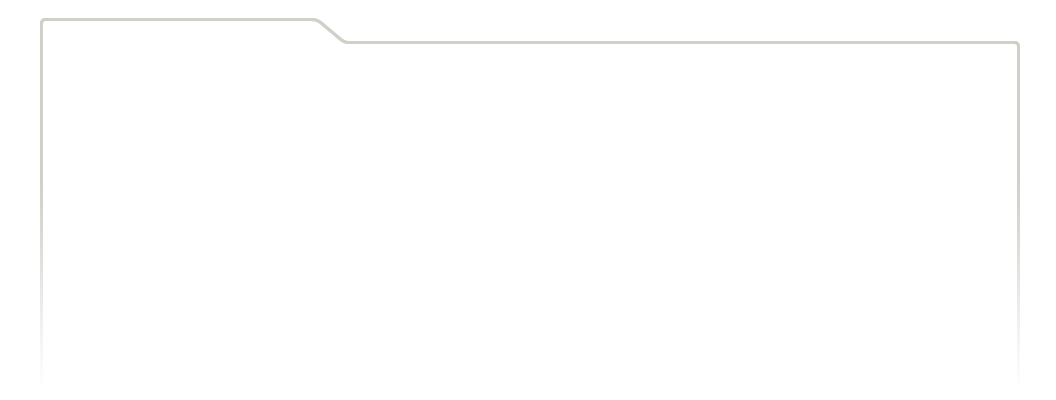
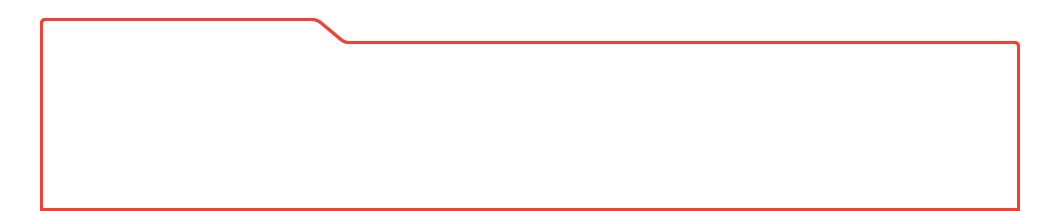
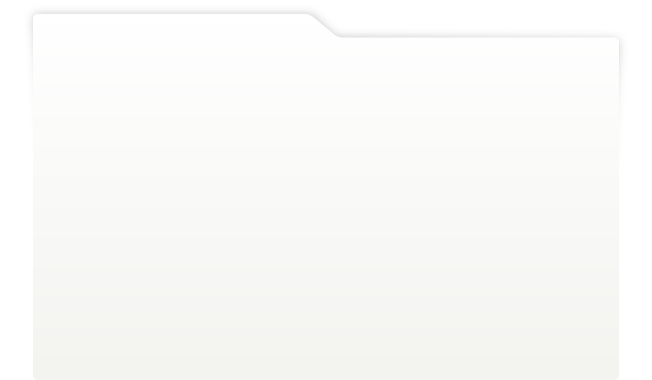
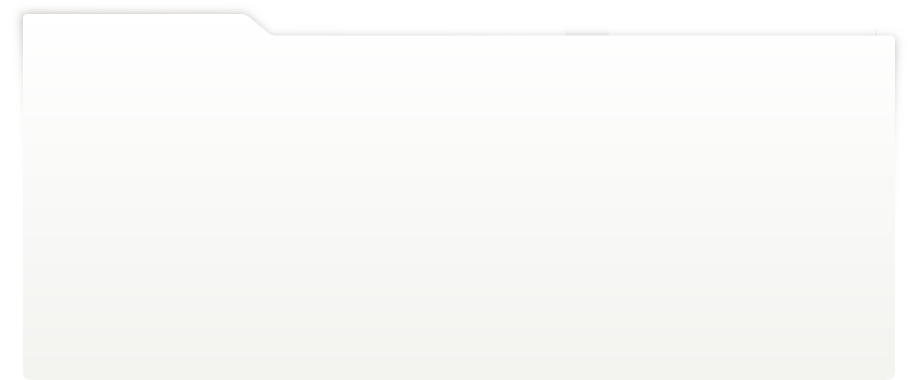
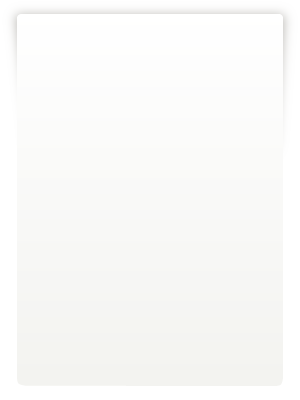
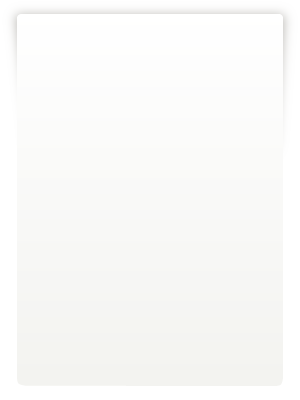
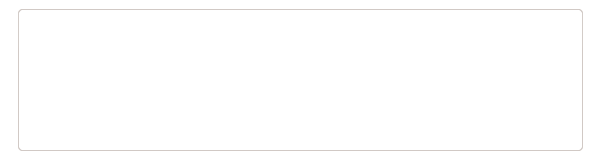
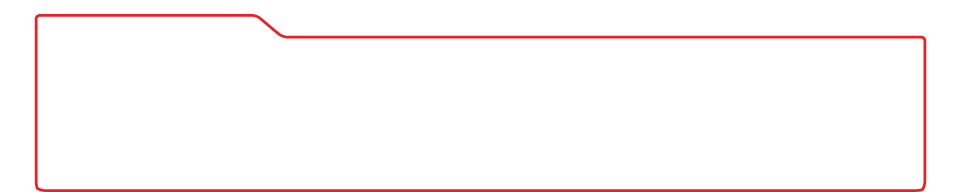
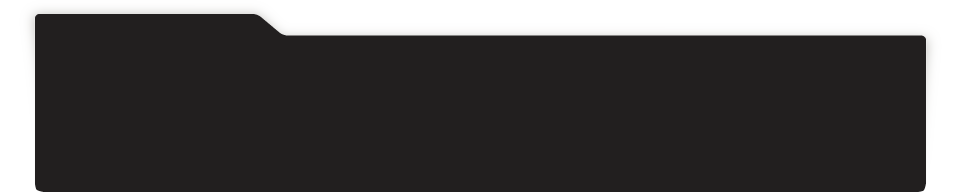
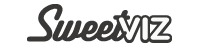
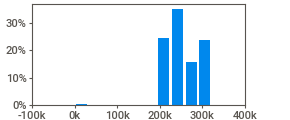
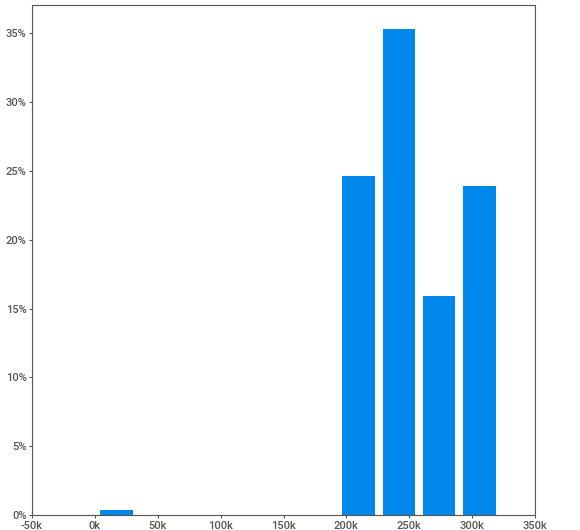
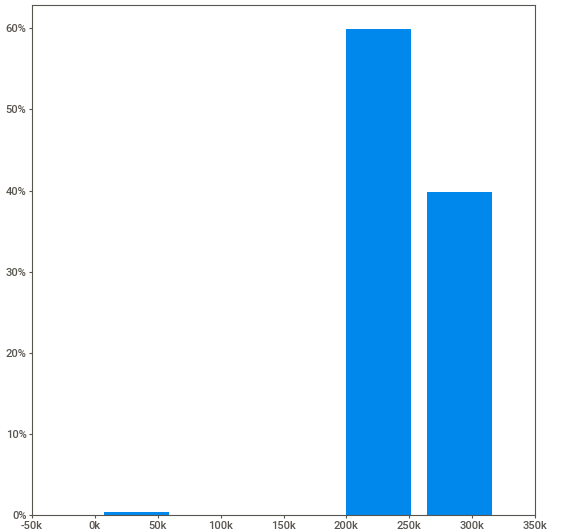
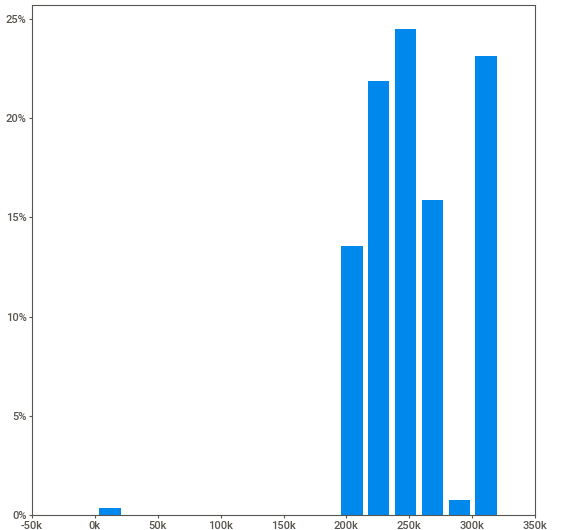
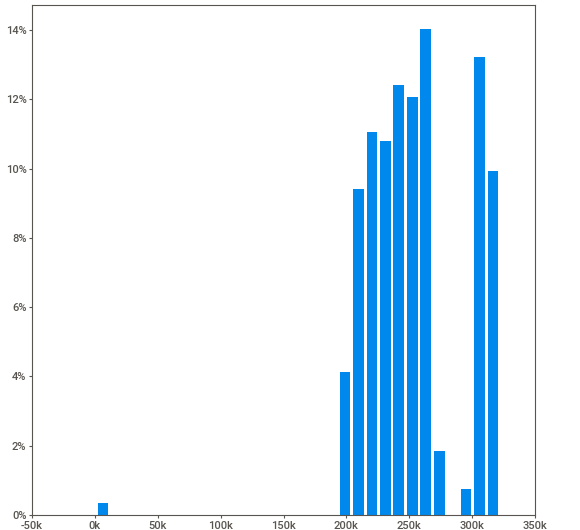
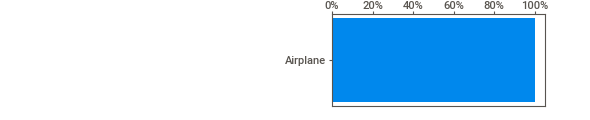
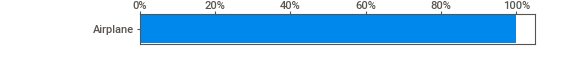
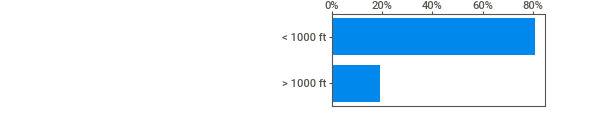
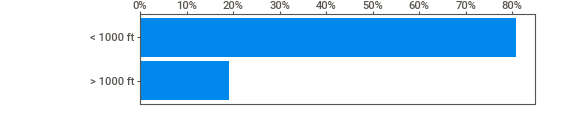
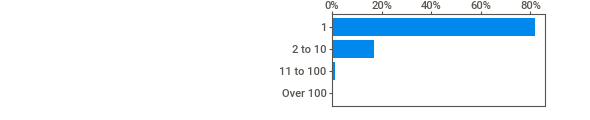
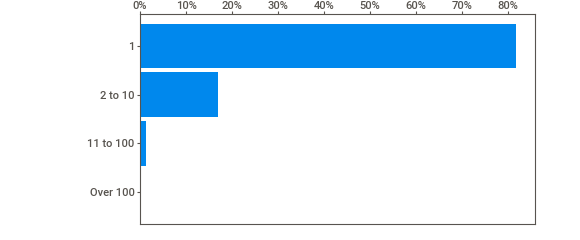
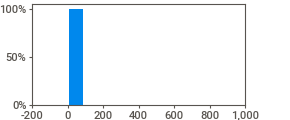
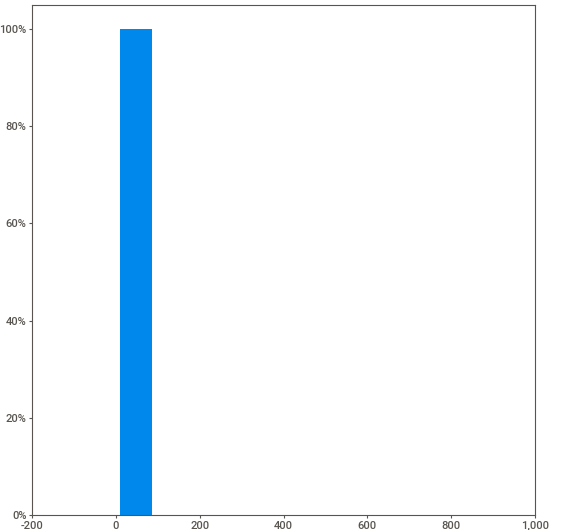
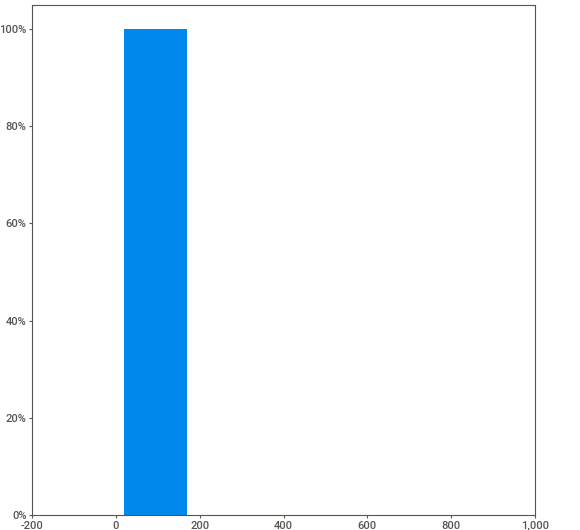
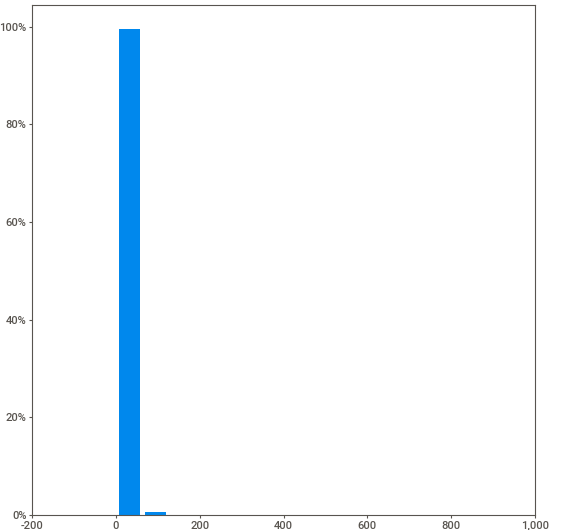
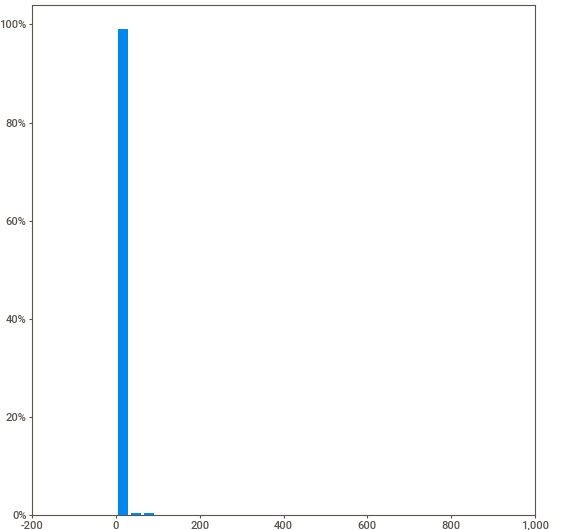
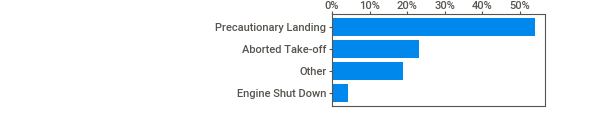
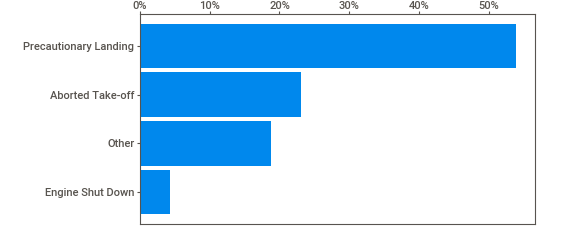
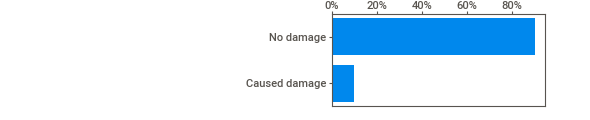
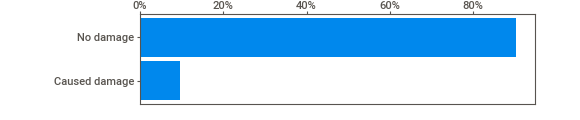
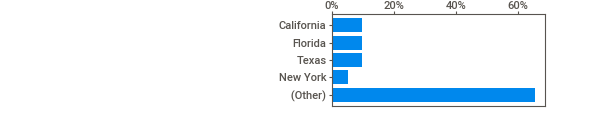
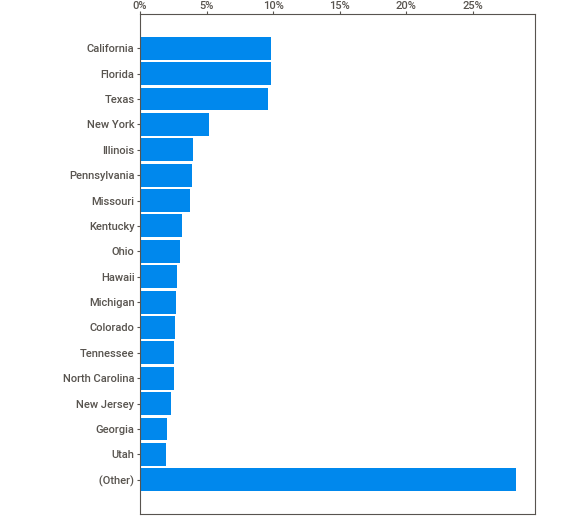
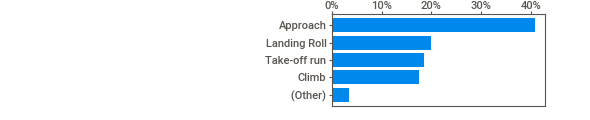
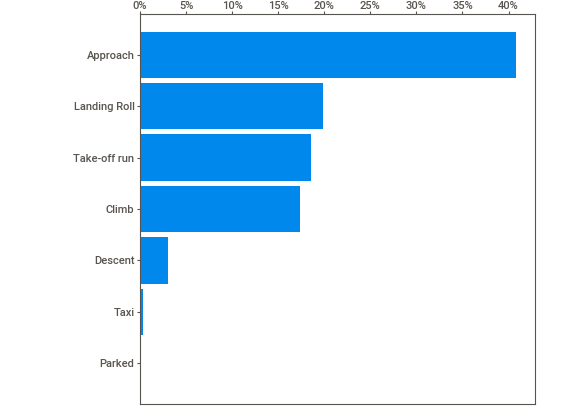
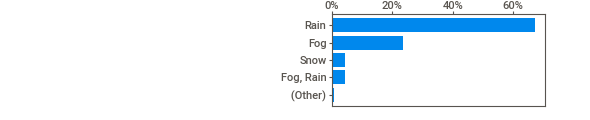
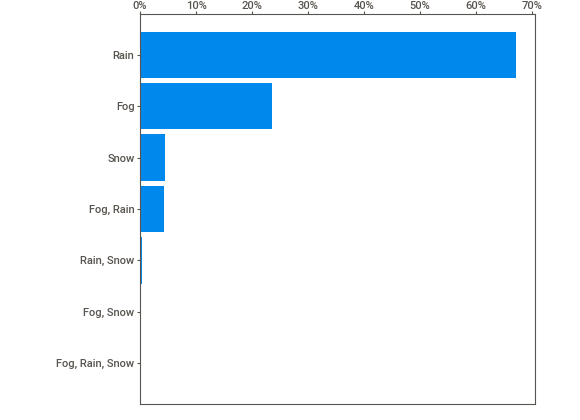
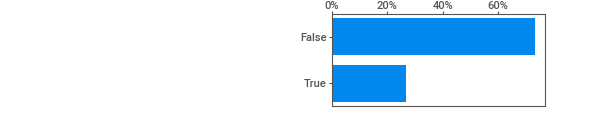
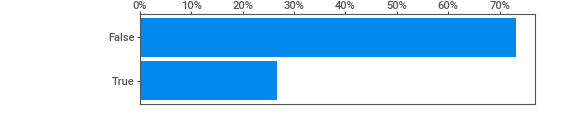
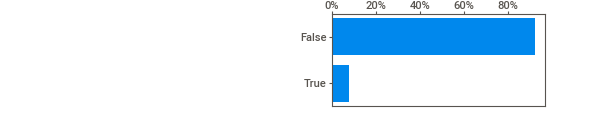
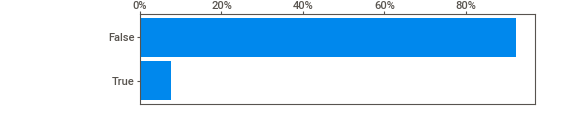
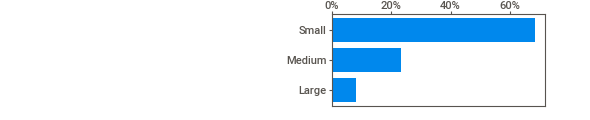
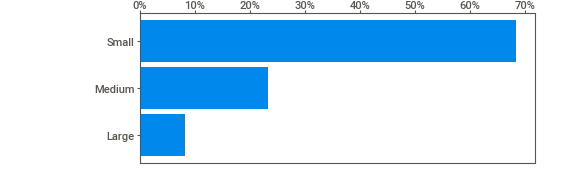
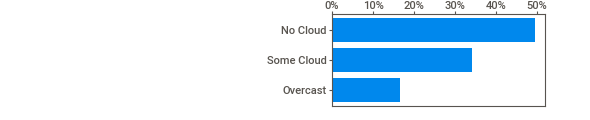
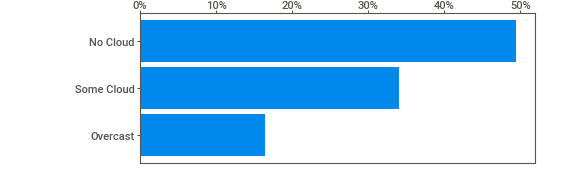
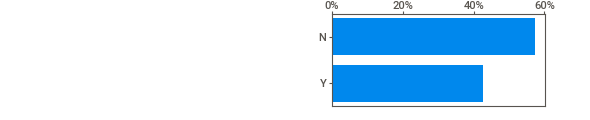
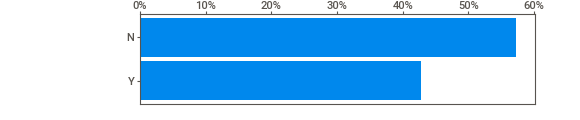
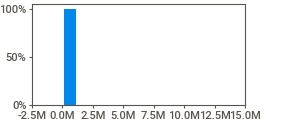
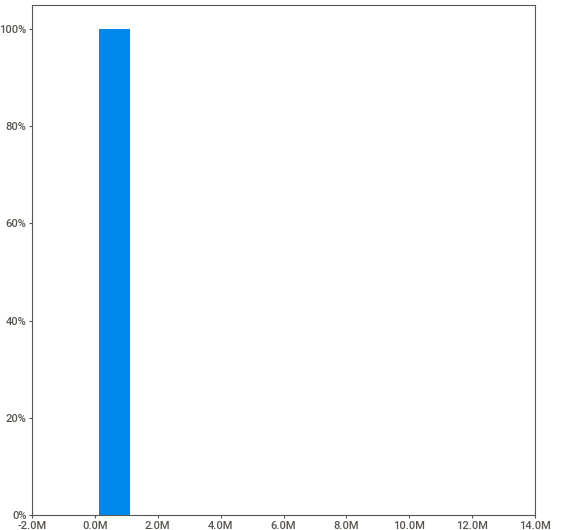
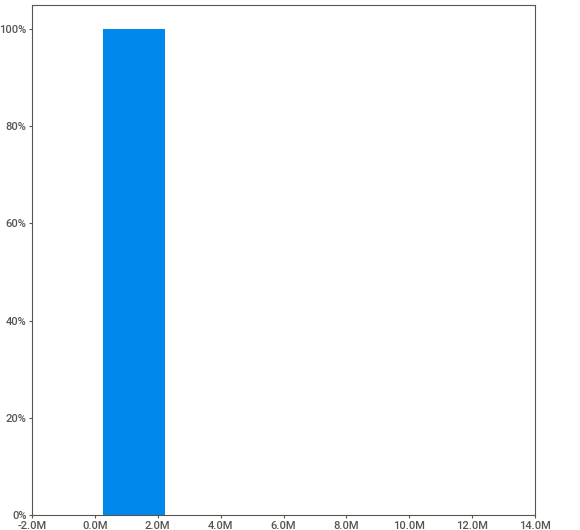
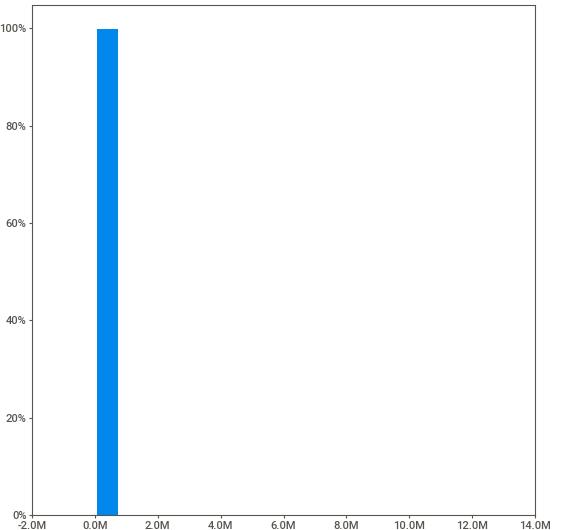
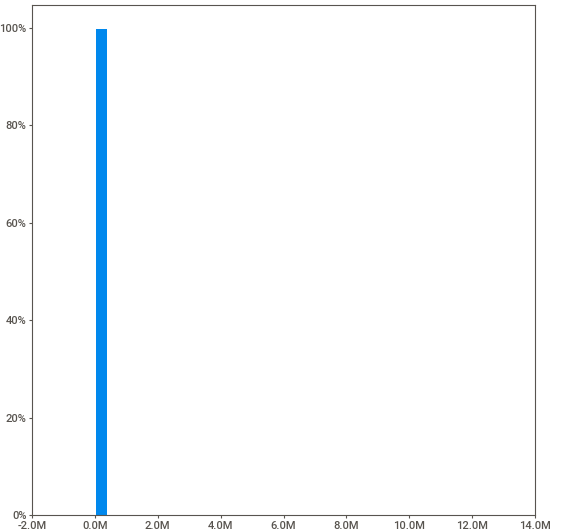
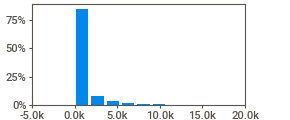
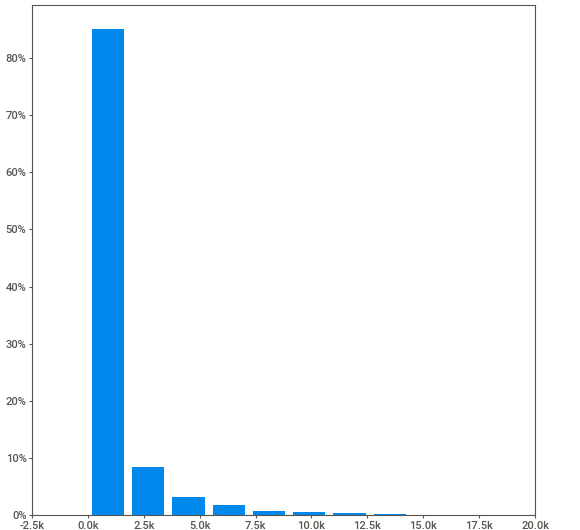
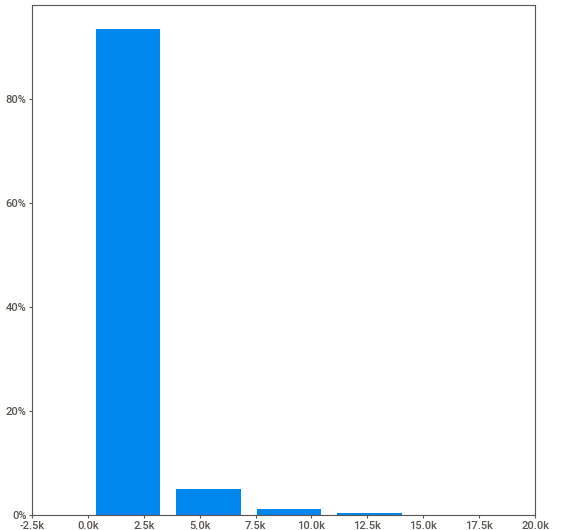
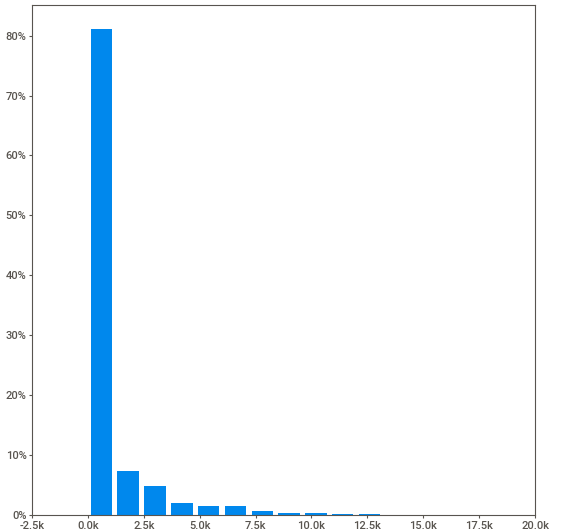
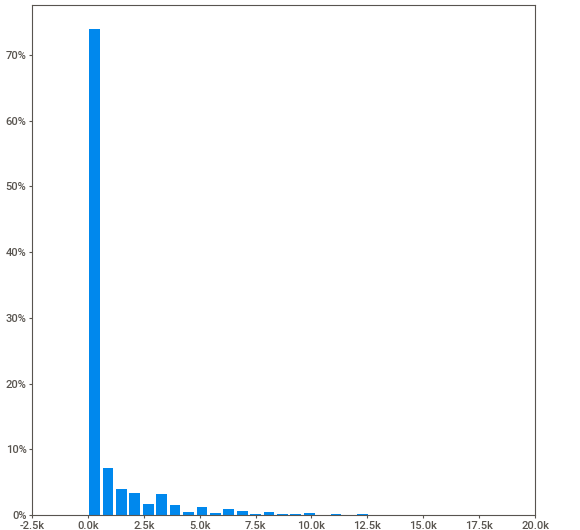
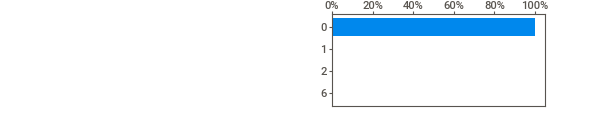
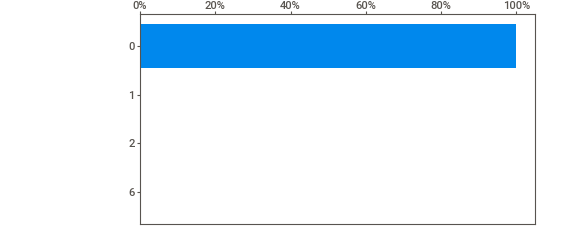
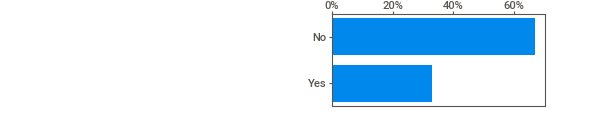
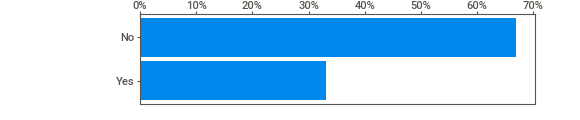
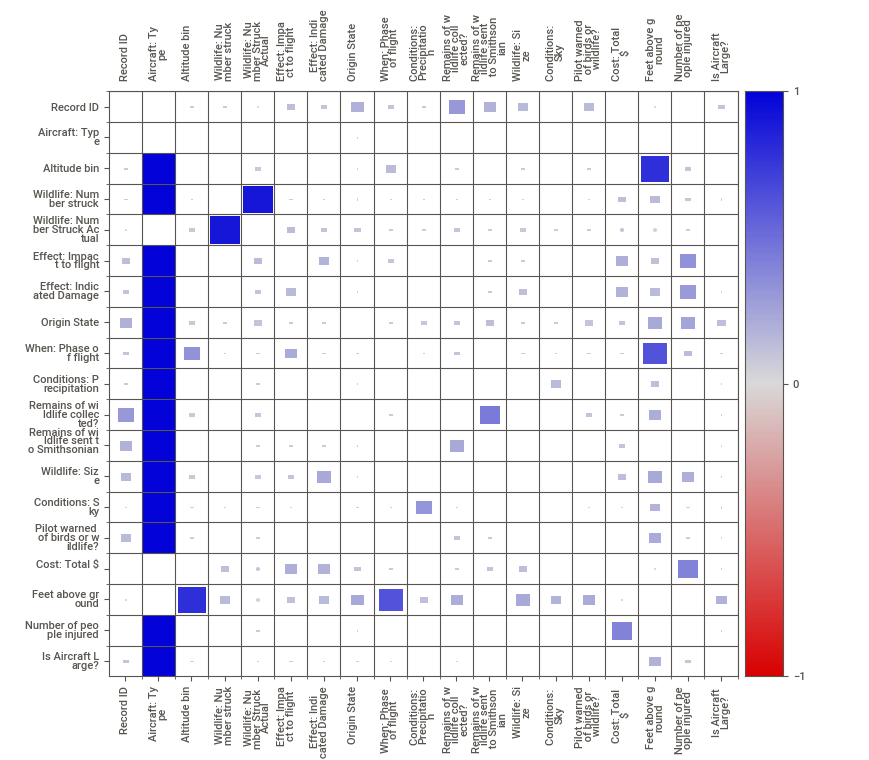
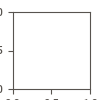

In [99]:
import sweetviz as sv

# Generate the analysis report
report = sv.analyze(bird_data)

# Display the report directly in the Colab notebook
report.show_notebook()



# [4. Question](#section4)

- 4.1 [Visuals Depicting the Number of Bird Strikes](#section401)

<Axes: xlabel='FlightDate'>

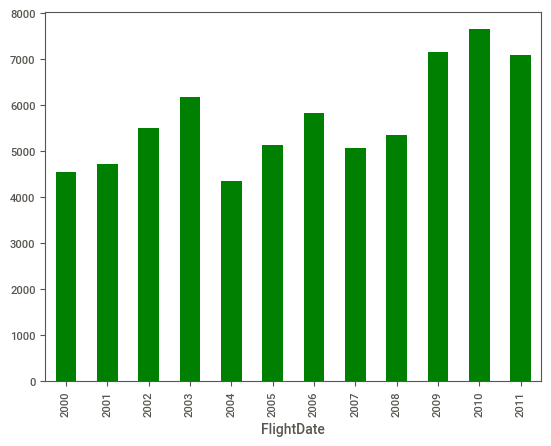

In [100]:
bird_data.groupby([bird_data['FlightDate'].dt.year])['Wildlife: Number Struck Actual'].sum().plot(kind='bar',color='g')

- 4.2 [Yearly Analysis](#section402)
    -[Total number of flight got strike with bird in year](#section)

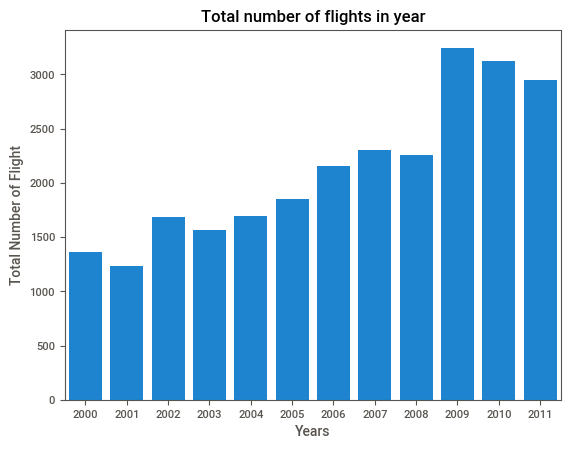

In [101]:
sns.countplot(x=bird_data['FlightDate'].dt.year,orient='v')
plt.xlabel("Years")
plt.ylabel("Total Number of Flight")
plt.title("Total number of flights in year")
plt.show()

- 4.3 [Bird Strikes in US](#section403)

In [102]:
bird_data['Airport: Name'].value_counts()

Airport: Name
DALLAS/FORT WORTH INTL ARPT    803
SACRAMENTO INTL                676
SALT LAKE CITY INTL            479
DENVER INTL AIRPORT            476
KANSAS CITY INTL               452
                              ... 
ORCAS ISLAND ARPT                1
T B LETTSOME INTL                1
DYERSBURG REGIONAL ARPT          1
MCCORD FIELD ARPT                1
PRINCESS JULIANA                 1
Name: count, Length: 1109, dtype: int64

- 4.4 [Top 10 US Airlines in terms of having encountered bird strikes](#section404)

<Axes: >

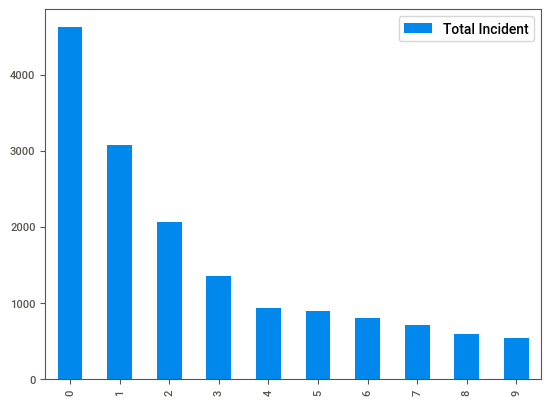

In [103]:
data=bird_data[['Aircraft: Airline/Operator','Airport: Name']]
data=data.groupby(['Aircraft: Airline/Operator']).count()
data.rename(columns = {'Airport: Name':'Total Incident'}, inplace = True)# change the name of the column
data=data.reset_index()
data=data.nlargest(10,'Total Incident') # it gives the 10 largest incident in airport
data=data.reset_index(drop=True)# drop the index and give arrange new sorted index
data.plot.bar()


- 4.5 [ Airports with most incidents of bird strikes – Top 50](#section405)

<Axes: >

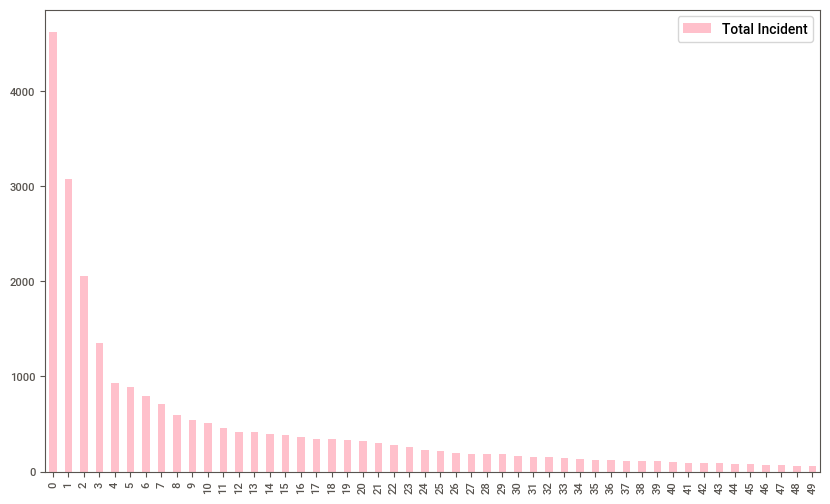

In [104]:
data=bird_data[['Aircraft: Airline/Operator','Airport: Name']]
data=data.groupby(['Aircraft: Airline/Operator']).count()
data.rename(columns = {'Airport: Name':'Total Incident'}, inplace = True)
data=data.reset_index()
data=data.nlargest(50,'Total Incident')
data=data.reset_index(drop=True)
data.plot(kind='bar',color='pink',figsize=(10,6))

- 4.6 [Yearly Cost Incurred due to Bird Strikes](#section406)

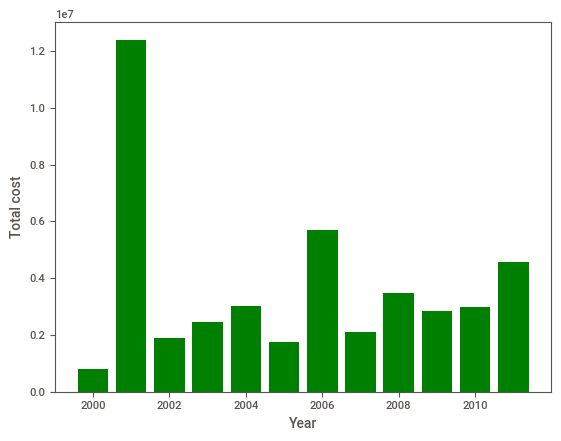

In [105]:
flight_year=bird_data['FlightDate'].dt.year
cost=bird_data['Cost: Total $']
plt.bar(flight_year,cost,color='g')
plt.xlabel('Year')
plt.ylabel("Total cost")
plt.show()

- 4.7 [When do most bird strikes occur?](#section407)

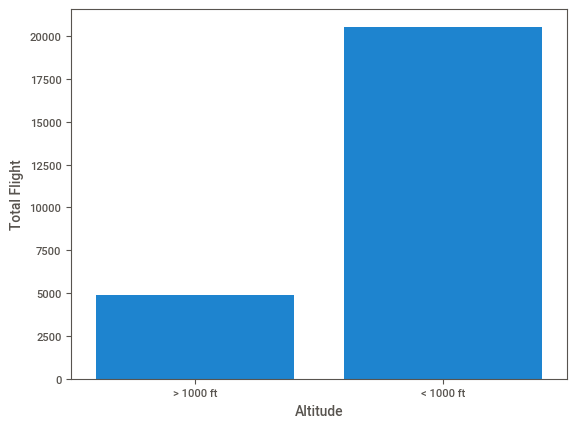

In [106]:
sns.countplot(x='Altitude bin',data=bird_data)
plt.xlabel('Altitude')
plt.ylabel('Total Flight')
plt.show()

- 4.8 [Altitude of airplanes at the time of strike](#section408)   

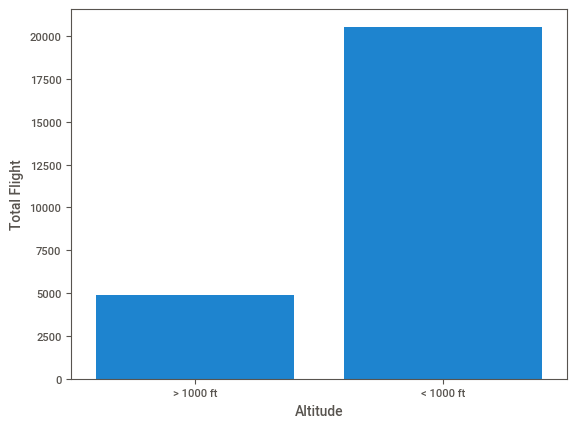

In [107]:
sns.countplot(x='Altitude bin',data=bird_data)
plt.xlabel('Altitude')
plt.ylabel('Total Flight')
plt.show()


- 4.9 [Phase of flight at the time of strike ](#section409)  

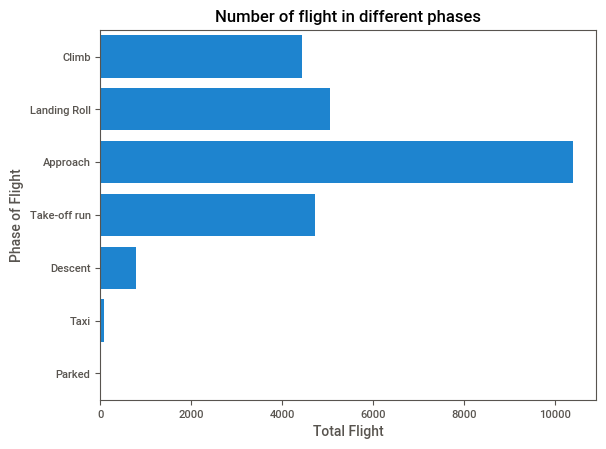

In [108]:
sns.countplot(y=bird_data['When: Phase of flight'],orient="h",dodge=True)
plt.title('Number of flight in different phases')
plt.ylabel('Phase of Flight')
plt.xlabel('Total Flight')
plt.show()

- 4.10 [Average Altitude of the airplanes in different phases at the time of strike](#section4010)

<Axes: xlabel='When: Phase of flight'>

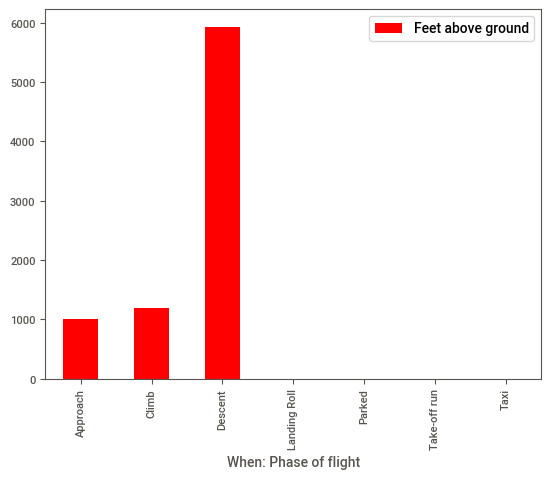

In [109]:
bird_data[['When: Phase of flight','Feet above ground']].groupby(['When: Phase of flight']).mean().plot(kind='bar',color='r')

In [110]:
bird_data.dtypes

Record ID                                           int64
Aircraft: Type                                     object
Airport: Name                                      object
Altitude bin                                       object
Aircraft: Make/Model                               object
Wildlife: Number struck                            object
Wildlife: Number Struck Actual                      int64
Effect: Impact to flight                           object
FlightDate                                 datetime64[ns]
Effect: Indicated Damage                           object
Aircraft: Airline/Operator                         object
Origin State                                       object
When: Phase of flight                              object
Conditions: Precipitation                          object
Remains of wildlife collected?                       bool
Remains of wildlife sent to Smithsonian              bool
Wildlife: Size                                     object
Conditions: Sk

- 4.11 [Effect of Bird Strikes ](#section4011)

In [111]:
bird_data['Effect: Indicated Damage'].value_counts()

Effect: Indicated Damage
No damage        22975
Caused damage     2454
Name: count, dtype: int64

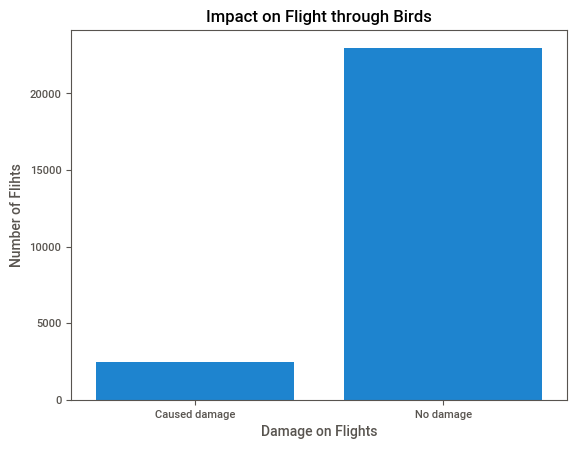

In [112]:
sns.countplot(x='Effect: Indicated Damage',data=bird_data)
plt.title('Impact on Flight through Birds')
plt.xlabel('Damage on Flights')
plt.ylabel('Number of Flihts')
plt.show()

- 4.12 [ Impact on Flight](#section4012)

Text(0.5, 1.0, 'Impact on flight by Birds')

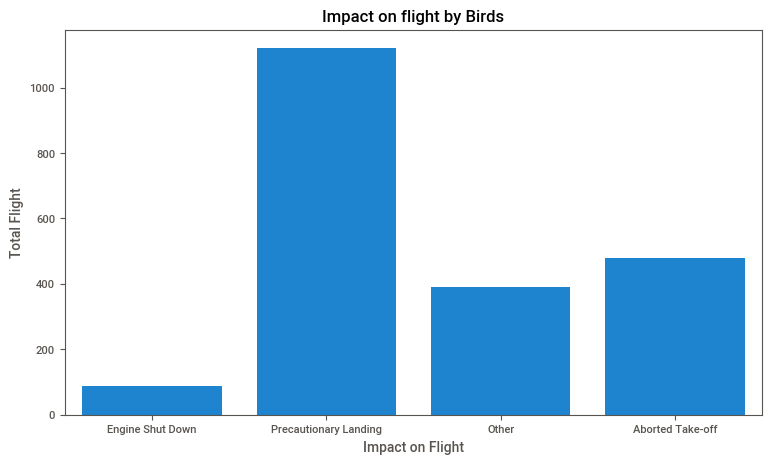

In [113]:
plt.figure(figsize=(9,5))
sns.countplot(x='Effect: Impact to flight',data=bird_data )
plt.xlabel('Impact on Flight')
plt.ylabel('Total Flight')
plt.title("Impact on flight by Birds")

- 4.13 [Effect of Strike at Different Altitude](#section4013)

<Axes: xlabel='Altitude bin', ylabel='count'>

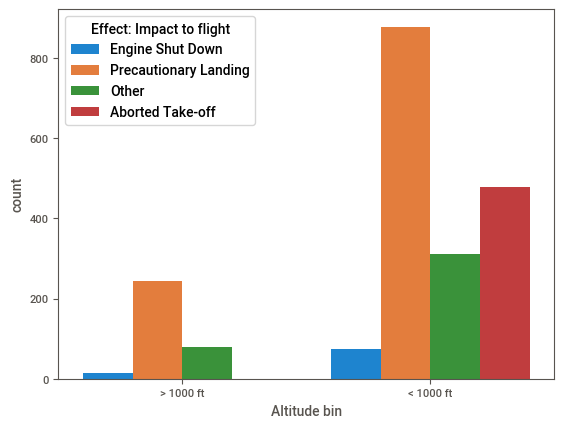

In [114]:
sns.countplot(x='Altitude bin',data=bird_data,hue='Effect: Impact to flight')

 - 4.14 [Were Pilots Informed?](#section4014)

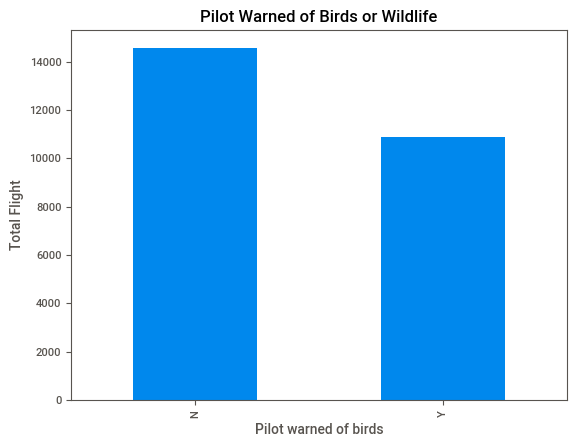

In [115]:
bird_data['Pilot warned of birds or wildlife?'].value_counts().plot.bar()
plt.xlabel('Pilot warned of birds')
plt.ylabel('Total Flight')
plt.title('Pilot Warned of Birds or Wildlife')

plt.show()

 - 4.15 [Prior Warning and Effect of Strike Relation](#section4015)

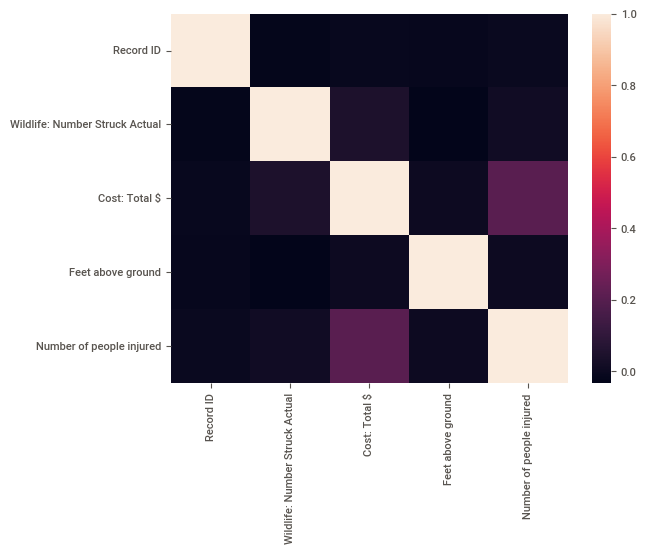

In [116]:
# Select numeric columns only
numeric_columns = bird_data.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix for numeric columns
correlation = bird_data[numeric_columns].corr()

# Plot the correlation matrix using seaborn's heatmap
sns.heatmap(correlation)
plt.show()


# Yearly analysis of bird strikes

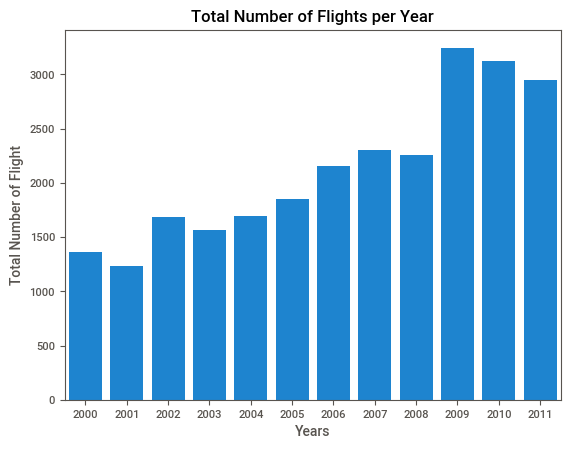

In [117]:
sns.countplot(x=bird_data['FlightDate'].dt.year, orient='v')
plt.xlabel("Years")
plt.ylabel("Total Number of Flight")
plt.title("Total Number of Flights per Year")
plt.show()

# Analysis of bird strikes by airline/operator

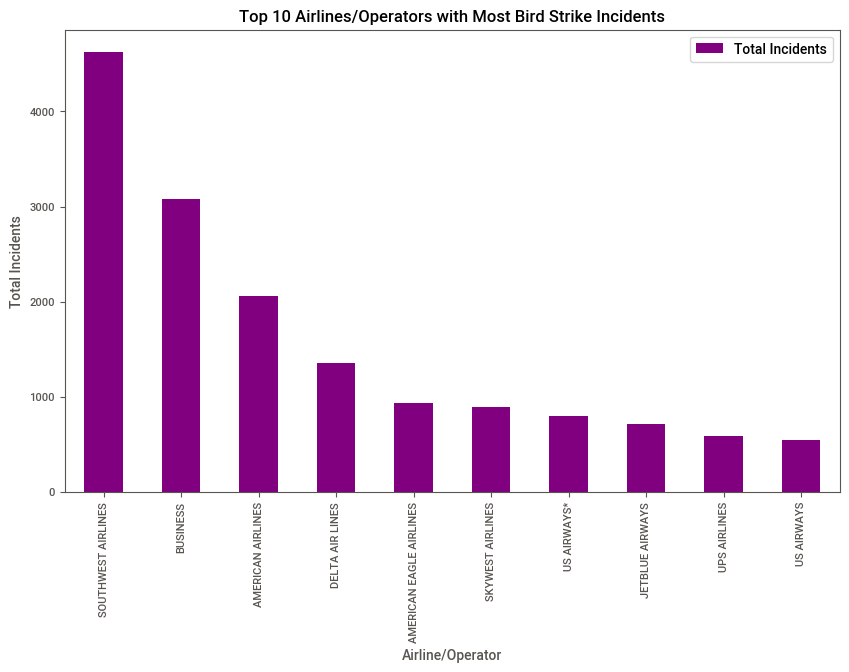

In [118]:

data = bird_data[['Aircraft: Airline/Operator', 'Airport: Name']]
data = data.groupby(['Aircraft: Airline/Operator']).count()
data.rename(columns={'Airport: Name': 'Total Incidents'}, inplace=True)
data = data.reset_index()
data = data.nlargest(10, 'Total Incidents')
data = data.reset_index(drop=True)
data.plot.bar(x='Aircraft: Airline/Operator', y='Total Incidents', color='purple', figsize=(10, 6))
plt.xlabel('Airline/Operator')
plt.ylabel('Total Incidents')
plt.title('Top 10 Airlines/Operators with Most Bird Strike Incidents')
plt.show()

# [Insight:-](#section)

1. Over the span of 11 years, there were approximately 25.43 thousand bird strike incidents.
2. During this period, more than 2400 aircraft were damaged due to bird strikes, resulting in repair costs amounting to 136 million dollars.
3. Out of the 25,429 flights involved in bird strike incidents, 22,975 flights suffered no damage, while 2,454 flights experienced varying degrees of damage.
4. The number of bird strike incidents has shown a consistent yearly increase from 2000 to 2011, with the highest number of strikes occurring in 2010 and the lowest in 2004.
5. Airlines such as Business, Southwest Airlines, American Airlines, Delta Air Airlines, and US Airlines have had a higher frequency of bird strike incidents compared to other airlines.
6. California has witnessed the highest number of bird strike incidents among all states in the USA, followed by Texas.
7. States like Montana have reported a relatively lower number of bird strike incidents compared to others.